In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
import numpy as np
import pickle as pkl
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix    

from flip_gradient import flip_gradient
from utils import *
from data_loader import *
import random 
import math
import time
random.seed(1337)
np.random.seed(1337)
tf.set_random_seed(1337)

os.environ["CUDA_VISIBLE_DEVICES"]='0'
with tf.device('/gpu:0'):  
    gpu_option = tf.GPUOptions(allow_growth = True)
    config = tf.ConfigProto(gpu_options = gpu_option)
#     config.gpu_options.allow_growth = True
    sess = tf.Session(config = config )
    
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())
# print('session:',sess)


# DATA Balance Random

In [2]:
# #get Balance Data
# def indices_to_one_hot(data, nb_classes):
#     """Convert an iterable of indices to one-hot encoded labels."""
#     targets = np.array(data).reshape(-1)
#     return np.eye(nb_classes)[targets]

# dataloader = DataLoader_Random()
# pairs1, pairs2 ,same_pair, pairs_label, domain_labels = dataloader.getBalanceData(4000)
# same_pair = same_pair.reshape(-1,1)
# domain_labels_o = indices_to_one_hot(domain_labels[:,0],2)

# pairs1 = pairs1[3000:]
# pairs2 = pairs2[3000:]
# same_pair = same_pair[3000:]
# pairs_label = pairs_label[3000:]
# domain_labels_o = domain_labels_o[3000:]

# pairs1_test, pairs2_tset, same_pair_test, pairs_label_test, domain_labels_test = dataloader.getBalanceData(100)
# domain_labels_o_test = indices_to_one_hot(domain_labels_test[:,0],2)
# same_pair_test = same_pair_test.reshape(-1,1)

# Data Random

In [3]:
# #get Random Data
# def indices_to_one_hot(data, nb_classes):
#     """Convert an iterable of indices to one-hot encoded labels."""
#     targets = np.array(data).reshape(-1)
#     return np.eye(nb_classes)[targets]

# dataloader = DataLoader_Random()
# pairs1, pairs2 ,same_pair, pairs_label, domain_labels = dataloader.getRandomData(4000)
# same_pair = same_pair.reshape(-1,1)
# domain_labels_o = indices_to_one_hot(domain_labels[:,0],2)

# # pairs1_test, pairs2_tset, same_pair_test, pairs_label_test, domain_labels_test = dataloader.getBalanceData(100)
# # domain_labels_o_test = indices_to_one_hot(domain_labels_test[:,0],2)
# # same_pair_test = same_pair_test.reshape(-1,1)

# Data min selection

In [4]:
def indices_to_one_hot(data, nb_classes):
    """Convert an iterable of indices to one-hot encoded labels."""
    targets = np.array(data).reshape(-1)
    return np.eye(nb_classes)[targets]

dataloader = DataLoader()
img_array, combine_label = dataloader.load_Casia()


suject nums from data:  ['001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '082', '083', '084', '085', '086', '087', '088', '089', '090', '091', '092', '093', '094', '095', '096', '097', '098', '099', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124']
file 001-bg-01-000.jpg
file 001-bg-01-018.jpg
file 001-bg-01-036.jpg
file 001-bg-01-054.jpg
file 001-bg-01-

file 006-nm-05-090.jpg
file 006-nm-05-108.jpg
file 006-nm-05-126.jpg
file 006-nm-05-144.jpg
file 006-nm-05-162.jpg
file 006-nm-05-180.jpg
file 006-nm-06-000.jpg
file 006-nm-06-018.jpg
file 006-nm-06-036.jpg
file 006-nm-06-054.jpg
file 006-nm-06-072.jpg
file 006-nm-06-090.jpg
file 006-nm-06-108.jpg
file 006-nm-06-126.jpg
file 006-nm-06-144.jpg
file 006-nm-06-162.jpg
file 006-nm-06-180.jpg
file 007-bg-01-000.jpg
file 007-bg-01-018.jpg
file 007-bg-01-036.jpg
file 007-bg-01-054.jpg
file 007-bg-01-072.jpg
file 007-bg-01-090.jpg
file 007-bg-01-108.jpg
file 007-bg-01-126.jpg
file 007-bg-01-144.jpg
file 007-bg-01-162.jpg
file 007-bg-01-180.jpg
file 007-bg-02-000.jpg
file 007-bg-02-018.jpg
file 007-bg-02-036.jpg
file 007-bg-02-054.jpg
file 007-bg-02-072.jpg
file 007-bg-02-090.jpg
file 007-bg-02-108.jpg
file 007-bg-02-126.jpg
file 007-bg-02-144.jpg
file 007-bg-02-162.jpg
file 007-bg-02-180.jpg
file 007-cl-01-000.jpg
file 007-cl-01-018.jpg
file 007-cl-01-036.jpg
file 007-cl-01-054.jpg
file 007-cl

file 012-nm-04-108.jpg
file 012-nm-04-126.jpg
file 012-nm-04-144.jpg
file 012-nm-04-162.jpg
file 012-nm-04-180.jpg
file 012-nm-05-000.jpg
file 012-nm-05-018.jpg
file 012-nm-05-036.jpg
file 012-nm-05-054.jpg
file 012-nm-05-072.jpg
file 012-nm-05-090.jpg
file 012-nm-05-108.jpg
file 012-nm-05-126.jpg
file 012-nm-05-144.jpg
file 012-nm-05-162.jpg
file 012-nm-05-180.jpg
file 012-nm-06-000.jpg
file 012-nm-06-018.jpg
file 012-nm-06-036.jpg
file 012-nm-06-054.jpg
file 012-nm-06-072.jpg
file 012-nm-06-090.jpg
file 012-nm-06-108.jpg
file 012-nm-06-126.jpg
file 012-nm-06-144.jpg
file 012-nm-06-162.jpg
file 012-nm-06-180.jpg
file 013-bg-01-000.jpg
file 013-bg-01-018.jpg
file 013-bg-01-036.jpg
file 013-bg-01-054.jpg
file 013-bg-01-072.jpg
file 013-bg-01-090.jpg
file 013-bg-01-108.jpg
file 013-bg-01-126.jpg
file 013-bg-01-144.jpg
file 013-bg-01-162.jpg
file 013-bg-01-180.jpg
file 013-bg-02-000.jpg
file 013-bg-02-018.jpg
file 013-bg-02-036.jpg
file 013-bg-02-054.jpg
file 013-bg-02-072.jpg
file 013-bg

file 018-nm-05-000.jpg
file 018-nm-05-018.jpg
file 018-nm-05-036.jpg
file 018-nm-05-054.jpg
file 018-nm-05-072.jpg
file 018-nm-05-090.jpg
file 018-nm-05-108.jpg
file 018-nm-05-126.jpg
file 018-nm-05-144.jpg
file 018-nm-05-162.jpg
file 018-nm-05-180.jpg
file 018-nm-06-000.jpg
file 018-nm-06-018.jpg
file 018-nm-06-036.jpg
file 018-nm-06-054.jpg
file 018-nm-06-072.jpg
file 018-nm-06-090.jpg
file 018-nm-06-108.jpg
file 018-nm-06-126.jpg
file 018-nm-06-144.jpg
file 018-nm-06-162.jpg
file 018-nm-06-180.jpg
file 019-bg-01-000.jpg
file 019-bg-01-018.jpg
file 019-bg-01-036.jpg
file 019-bg-01-054.jpg
file 019-bg-01-072.jpg
file 019-bg-01-090.jpg
file 019-bg-01-108.jpg
file 019-bg-01-126.jpg
file 019-bg-01-144.jpg
file 019-bg-01-162.jpg
file 019-bg-01-180.jpg
file 019-bg-02-000.jpg
file 019-bg-02-018.jpg
file 019-bg-02-036.jpg
file 019-bg-02-054.jpg
file 019-bg-02-072.jpg
file 019-bg-02-090.jpg
file 019-bg-02-108.jpg
file 019-bg-02-126.jpg
file 019-bg-02-144.jpg
file 019-bg-02-162.jpg
file 019-bg

file 024-nm-04-072.jpg
file 024-nm-04-090.jpg
file 024-nm-04-108.jpg
file 024-nm-04-126.jpg
file 024-nm-04-144.jpg
file 024-nm-04-162.jpg
file 024-nm-04-180.jpg
file 024-nm-05-000.jpg
file 024-nm-05-018.jpg
file 024-nm-05-036.jpg
file 024-nm-05-054.jpg
file 024-nm-05-072.jpg
file 024-nm-05-090.jpg
file 024-nm-05-108.jpg
file 024-nm-05-126.jpg
file 024-nm-05-144.jpg
file 024-nm-05-162.jpg
file 024-nm-05-180.jpg
file 024-nm-06-000.jpg
file 024-nm-06-018.jpg
file 024-nm-06-036.jpg
file 024-nm-06-054.jpg
file 024-nm-06-072.jpg
file 024-nm-06-090.jpg
file 024-nm-06-108.jpg
file 024-nm-06-126.jpg
file 024-nm-06-144.jpg
file 024-nm-06-162.jpg
file 024-nm-06-180.jpg
file 025-bg-01-000.jpg
file 025-bg-01-018.jpg
file 025-bg-01-036.jpg
file 025-bg-01-054.jpg
file 025-bg-01-072.jpg
file 025-bg-01-090.jpg
file 025-bg-01-108.jpg
file 025-bg-01-126.jpg
file 025-bg-01-144.jpg
file 025-bg-01-162.jpg
file 025-bg-01-180.jpg
file 025-bg-02-000.jpg
file 025-bg-02-018.jpg
file 025-bg-02-036.jpg
file 025-bg

file 030-nm-03-180.jpg
file 030-nm-04-000.jpg
file 030-nm-04-018.jpg
file 030-nm-04-036.jpg
file 030-nm-04-054.jpg
file 030-nm-04-072.jpg
file 030-nm-04-090.jpg
file 030-nm-04-108.jpg
file 030-nm-04-126.jpg
file 030-nm-04-144.jpg
file 030-nm-04-162.jpg
file 030-nm-04-180.jpg
file 030-nm-05-000.jpg
file 030-nm-05-018.jpg
file 030-nm-05-036.jpg
file 030-nm-05-054.jpg
file 030-nm-05-072.jpg
file 030-nm-05-090.jpg
file 030-nm-05-108.jpg
file 030-nm-05-126.jpg
file 030-nm-05-144.jpg
file 030-nm-05-162.jpg
file 030-nm-05-180.jpg
file 030-nm-06-000.jpg
file 030-nm-06-018.jpg
file 030-nm-06-036.jpg
file 030-nm-06-054.jpg
file 030-nm-06-072.jpg
file 030-nm-06-090.jpg
file 030-nm-06-108.jpg
file 030-nm-06-126.jpg
file 030-nm-06-144.jpg
file 030-nm-06-162.jpg
file 030-nm-06-180.jpg
file 031-bg-01-000.jpg
file 031-bg-01-018.jpg
file 031-bg-01-036.jpg
file 031-bg-01-054.jpg
file 031-bg-01-072.jpg
file 031-bg-01-090.jpg
file 031-bg-01-108.jpg
file 031-bg-01-126.jpg
file 031-bg-01-144.jpg
file 031-bg

file 037-nm-06-036.jpg
file 037-nm-06-054.jpg
file 037-nm-06-072.jpg
file 037-nm-06-090.jpg
file 037-nm-06-108.jpg
file 037-nm-06-126.jpg
file 037-nm-06-144.jpg
file 037-nm-06-162.jpg
file 037-nm-06-180.jpg
file 038-bg-01-000.jpg
file 038-bg-01-018.jpg
file 038-bg-01-036.jpg
file 038-bg-01-054.jpg
file 038-bg-01-072.jpg
file 038-bg-01-090.jpg
file 038-bg-01-108.jpg
file 038-bg-01-126.jpg
file 038-bg-01-144.jpg
file 038-bg-01-162.jpg
file 038-bg-01-180.jpg
file 038-bg-02-000.jpg
file 038-bg-02-018.jpg
file 038-bg-02-036.jpg
file 038-bg-02-054.jpg
file 038-bg-02-072.jpg
file 038-bg-02-090.jpg
file 038-bg-02-108.jpg
file 038-bg-02-126.jpg
file 038-bg-02-144.jpg
file 038-bg-02-162.jpg
file 038-bg-02-180.jpg
file 038-cl-01-000.jpg
file 038-cl-01-018.jpg
file 038-cl-01-036.jpg
file 038-cl-01-054.jpg
file 038-cl-01-072.jpg
file 038-cl-01-090.jpg
file 038-cl-01-108.jpg
file 038-cl-01-126.jpg
file 038-cl-01-144.jpg
file 038-cl-01-162.jpg
file 038-cl-01-180.jpg
file 038-cl-02-000.jpg
file 038-cl

file 044-bg-01-000.jpg
file 044-bg-01-018.jpg
file 044-bg-01-036.jpg
file 044-bg-01-054.jpg
file 044-bg-01-072.jpg
file 044-bg-01-090.jpg
file 044-bg-01-108.jpg
file 044-bg-01-126.jpg
file 044-bg-01-144.jpg
file 044-bg-01-162.jpg
file 044-bg-01-180.jpg
file 044-bg-02-000.jpg
file 044-bg-02-018.jpg
file 044-bg-02-036.jpg
file 044-bg-02-054.jpg
file 044-bg-02-072.jpg
file 044-bg-02-090.jpg
file 044-bg-02-108.jpg
file 044-bg-02-126.jpg
file 044-bg-02-144.jpg
file 044-bg-02-162.jpg
file 044-bg-02-180.jpg
file 044-cl-01-000.jpg
file 044-cl-01-018.jpg
file 044-cl-01-036.jpg
file 044-cl-01-054.jpg
file 044-cl-01-072.jpg
file 044-cl-01-090.jpg
file 044-cl-01-108.jpg
file 044-cl-01-126.jpg
file 044-cl-01-144.jpg
file 044-cl-01-162.jpg
file 044-cl-01-180.jpg
file 044-cl-02-000.jpg
file 044-cl-02-018.jpg
file 044-cl-02-036.jpg
file 044-cl-02-054.jpg
file 044-cl-02-072.jpg
file 044-cl-02-090.jpg
file 044-cl-02-108.jpg
file 044-cl-02-126.jpg
file 044-cl-02-144.jpg
file 044-cl-02-162.jpg
file 044-cl

file 050-cl-01-180.jpg
file 050-cl-02-000.jpg
file 050-cl-02-018.jpg
file 050-cl-02-036.jpg
file 050-cl-02-054.jpg
file 050-cl-02-072.jpg
file 050-cl-02-090.jpg
file 050-cl-02-108.jpg
file 050-cl-02-126.jpg
file 050-cl-02-144.jpg
file 050-cl-02-162.jpg
file 050-cl-02-180.jpg
file 050-nm-01-000.jpg
file 050-nm-01-018.jpg
file 050-nm-01-036.jpg
file 050-nm-01-054.jpg
file 050-nm-01-072.jpg
file 050-nm-01-090.jpg
file 050-nm-01-108.jpg
file 050-nm-01-126.jpg
file 050-nm-01-144.jpg
file 050-nm-01-162.jpg
file 050-nm-01-180.jpg
file 050-nm-02-000.jpg
file 050-nm-02-018.jpg
file 050-nm-02-036.jpg
file 050-nm-02-054.jpg
file 050-nm-02-072.jpg
file 050-nm-02-090.jpg
file 050-nm-02-108.jpg
file 050-nm-02-126.jpg
file 050-nm-02-144.jpg
file 050-nm-02-162.jpg
file 050-nm-02-180.jpg
file 050-nm-03-000.jpg
file 050-nm-03-018.jpg
file 050-nm-03-036.jpg
file 050-nm-03-054.jpg
file 050-nm-03-072.jpg
file 050-nm-03-090.jpg
file 050-nm-03-108.jpg
file 050-nm-03-126.jpg
file 050-nm-03-144.jpg
file 050-nm

file 056-bg-01-072.jpg
file 056-bg-01-090.jpg
file 056-bg-01-108.jpg
file 056-bg-01-126.jpg
file 056-bg-01-144.jpg
file 056-bg-01-162.jpg
file 056-bg-01-180.jpg
file 056-bg-02-000.jpg
file 056-bg-02-018.jpg
file 056-bg-02-036.jpg
file 056-bg-02-054.jpg
file 056-bg-02-072.jpg
file 056-bg-02-090.jpg
file 056-bg-02-108.jpg
file 056-bg-02-126.jpg
file 056-bg-02-144.jpg
file 056-bg-02-162.jpg
file 056-bg-02-180.jpg
file 056-cl-01-000.jpg
file 056-cl-01-018.jpg
file 056-cl-01-036.jpg
file 056-cl-01-054.jpg
file 056-cl-01-072.jpg
file 056-cl-01-090.jpg
file 056-cl-01-108.jpg
file 056-cl-01-126.jpg
file 056-cl-01-144.jpg
file 056-cl-01-162.jpg
file 056-cl-01-180.jpg
file 056-cl-02-000.jpg
file 056-cl-02-018.jpg
file 056-cl-02-036.jpg
file 056-cl-02-054.jpg
file 056-cl-02-072.jpg
file 056-cl-02-090.jpg
file 056-cl-02-108.jpg
file 056-cl-02-126.jpg
file 056-cl-02-144.jpg
file 056-cl-02-162.jpg
file 056-cl-02-180.jpg
file 056-nm-01-000.jpg
file 056-nm-01-018.jpg
file 056-nm-01-036.jpg
file 056-nm

file 061-nm-05-144.jpg
file 061-nm-05-162.jpg
file 061-nm-05-180.jpg
file 061-nm-06-000.jpg
file 061-nm-06-018.jpg
file 061-nm-06-036.jpg
file 061-nm-06-054.jpg
file 061-nm-06-072.jpg
file 061-nm-06-090.jpg
file 061-nm-06-108.jpg
file 061-nm-06-126.jpg
file 061-nm-06-144.jpg
file 061-nm-06-162.jpg
file 061-nm-06-180.jpg
file 062-bg-01-000.jpg
file 062-bg-01-018.jpg
file 062-bg-01-036.jpg
file 062-bg-01-054.jpg
file 062-bg-01-072.jpg
file 062-bg-01-090.jpg
file 062-bg-01-108.jpg
file 062-bg-01-126.jpg
file 062-bg-01-144.jpg
file 062-bg-01-162.jpg
file 062-bg-01-180.jpg
file 062-bg-02-000.jpg
file 062-bg-02-018.jpg
file 062-bg-02-036.jpg
file 062-bg-02-054.jpg
file 062-bg-02-072.jpg
file 062-bg-02-090.jpg
file 062-bg-02-108.jpg
file 062-bg-02-126.jpg
file 062-bg-02-144.jpg
file 062-bg-02-162.jpg
file 062-bg-02-180.jpg
file 062-cl-01-000.jpg
file 062-cl-01-018.jpg
file 062-cl-01-036.jpg
file 062-cl-01-054.jpg
file 062-cl-01-072.jpg
file 062-cl-01-090.jpg
file 062-cl-01-108.jpg
file 062-cl

file 068-cl-01-090.jpg
file 068-cl-01-108.jpg
file 068-cl-01-126.jpg
file 068-cl-01-144.jpg
file 068-cl-01-162.jpg
file 068-cl-01-180.jpg
file 068-cl-02-000.jpg
file 068-cl-02-018.jpg
file 068-cl-02-036.jpg
file 068-cl-02-054.jpg
file 068-cl-02-072.jpg
file 068-cl-02-090.jpg
file 068-cl-02-108.jpg
file 068-cl-02-126.jpg
file 068-cl-02-144.jpg
file 068-cl-02-162.jpg
file 068-cl-02-180.jpg
file 068-nm-01-000.jpg
file 068-nm-01-018.jpg
file 068-nm-01-036.jpg
file 068-nm-01-072.jpg
file 068-nm-01-090.jpg
file 068-nm-01-108.jpg
file 068-nm-01-180.jpg
file 068-nm-02-000.jpg
file 068-nm-02-018.jpg
file 068-nm-02-036.jpg
file 068-nm-02-054.jpg
file 068-nm-02-072.jpg
file 068-nm-02-090.jpg
file 068-nm-02-108.jpg
file 068-nm-02-144.jpg
file 068-nm-02-180.jpg
file 068-nm-03-000.jpg
file 068-nm-03-018.jpg
file 068-nm-03-036.jpg
file 068-nm-03-054.jpg
file 068-nm-03-072.jpg
file 068-nm-03-090.jpg
file 068-nm-03-108.jpg
file 068-nm-03-162.jpg
file 068-nm-04-000.jpg
file 068-nm-04-018.jpg
file 068-nm

file 074-cl-01-180.jpg
file 074-cl-02-000.jpg
file 074-cl-02-018.jpg
file 074-cl-02-036.jpg
file 074-cl-02-054.jpg
file 074-cl-02-072.jpg
file 074-cl-02-090.jpg
file 074-cl-02-108.jpg
file 074-cl-02-126.jpg
file 074-cl-02-144.jpg
file 074-cl-02-162.jpg
file 074-cl-02-180.jpg
file 074-nm-01-000.jpg
file 074-nm-01-018.jpg
file 074-nm-01-036.jpg
file 074-nm-01-054.jpg
file 074-nm-01-072.jpg
file 074-nm-01-090.jpg
file 074-nm-01-108.jpg
file 074-nm-01-126.jpg
file 074-nm-01-144.jpg
file 074-nm-01-162.jpg
file 074-nm-01-180.jpg
file 074-nm-02-000.jpg
file 074-nm-02-018.jpg
file 074-nm-02-036.jpg
file 074-nm-02-054.jpg
file 074-nm-02-072.jpg
file 074-nm-02-090.jpg
file 074-nm-02-108.jpg
file 074-nm-02-126.jpg
file 074-nm-02-144.jpg
file 074-nm-02-162.jpg
file 074-nm-02-180.jpg
file 074-nm-03-000.jpg
file 074-nm-03-018.jpg
file 074-nm-03-036.jpg
file 074-nm-03-054.jpg
file 074-nm-03-072.jpg
file 074-nm-03-090.jpg
file 074-nm-03-108.jpg
file 074-nm-03-126.jpg
file 074-nm-03-144.jpg
file 074-nm

file 080-nm-01-126.jpg
file 080-nm-01-144.jpg
file 080-nm-01-162.jpg
file 080-nm-01-180.jpg
file 080-nm-02-000.jpg
file 080-nm-02-018.jpg
file 080-nm-02-036.jpg
file 080-nm-02-054.jpg
file 080-nm-02-072.jpg
file 080-nm-02-090.jpg
file 080-nm-02-108.jpg
file 080-nm-02-126.jpg
file 080-nm-02-144.jpg
file 080-nm-02-162.jpg
file 080-nm-02-180.jpg
file 080-nm-03-000.jpg
file 080-nm-03-018.jpg
file 080-nm-03-036.jpg
file 080-nm-03-054.jpg
file 080-nm-03-072.jpg
file 080-nm-03-090.jpg
file 080-nm-03-108.jpg
file 080-nm-03-126.jpg
file 080-nm-03-144.jpg
file 080-nm-03-162.jpg
file 080-nm-03-180.jpg
file 080-nm-04-000.jpg
file 080-nm-04-018.jpg
file 080-nm-04-036.jpg
file 080-nm-04-054.jpg
file 080-nm-04-072.jpg
file 080-nm-04-090.jpg
file 080-nm-04-108.jpg
file 080-nm-04-126.jpg
file 080-nm-04-144.jpg
file 080-nm-04-162.jpg
file 080-nm-04-180.jpg
file 080-nm-05-000.jpg
file 080-nm-05-018.jpg
file 080-nm-05-036.jpg
file 080-nm-05-054.jpg
file 080-nm-05-072.jpg
file 080-nm-05-090.jpg
file 080-nm

file 086-nm-03-126.jpg
file 086-nm-03-144.jpg
file 086-nm-03-162.jpg
file 086-nm-03-180.jpg
file 086-nm-04-000.jpg
file 086-nm-04-018.jpg
file 086-nm-04-036.jpg
file 086-nm-04-054.jpg
file 086-nm-04-072.jpg
file 086-nm-04-090.jpg
file 086-nm-04-108.jpg
file 086-nm-04-126.jpg
file 086-nm-04-144.jpg
file 086-nm-04-162.jpg
file 086-nm-04-180.jpg
file 086-nm-05-000.jpg
file 086-nm-05-018.jpg
file 086-nm-05-036.jpg
file 086-nm-05-054.jpg
file 086-nm-05-072.jpg
file 086-nm-05-090.jpg
file 086-nm-05-108.jpg
file 086-nm-05-126.jpg
file 086-nm-05-144.jpg
file 086-nm-05-162.jpg
file 086-nm-05-180.jpg
file 086-nm-06-000.jpg
file 086-nm-06-018.jpg
file 086-nm-06-036.jpg
file 086-nm-06-054.jpg
file 086-nm-06-072.jpg
file 086-nm-06-090.jpg
file 086-nm-06-108.jpg
file 086-nm-06-126.jpg
file 086-nm-06-144.jpg
file 086-nm-06-162.jpg
file 086-nm-06-180.jpg
file 087-bg-01-000.jpg
file 087-bg-01-018.jpg
file 087-bg-01-036.jpg
file 087-bg-01-054.jpg
file 087-bg-01-072.jpg
file 087-bg-01-090.jpg
file 087-bg

file 092-nm-05-144.jpg
file 092-nm-05-162.jpg
file 092-nm-05-180.jpg
file 092-nm-06-000.jpg
file 092-nm-06-018.jpg
file 092-nm-06-036.jpg
file 092-nm-06-054.jpg
file 092-nm-06-072.jpg
file 092-nm-06-090.jpg
file 092-nm-06-108.jpg
file 092-nm-06-126.jpg
file 092-nm-06-144.jpg
file 092-nm-06-162.jpg
file 092-nm-06-180.jpg
file 093-bg-01-000.jpg
file 093-bg-01-018.jpg
file 093-bg-01-036.jpg
file 093-bg-01-054.jpg
file 093-bg-01-072.jpg
file 093-bg-01-090.jpg
file 093-bg-01-108.jpg
file 093-bg-01-126.jpg
file 093-bg-01-144.jpg
file 093-bg-01-162.jpg
file 093-bg-01-180.jpg
file 093-bg-02-000.jpg
file 093-bg-02-018.jpg
file 093-bg-02-036.jpg
file 093-bg-02-054.jpg
file 093-bg-02-072.jpg
file 093-bg-02-090.jpg
file 093-bg-02-108.jpg
file 093-bg-02-126.jpg
file 093-bg-02-144.jpg
file 093-bg-02-162.jpg
file 093-bg-02-180.jpg
file 093-cl-01-000.jpg
file 093-cl-01-018.jpg
file 093-cl-01-036.jpg
file 093-cl-01-054.jpg
file 093-cl-01-072.jpg
file 093-cl-01-090.jpg
file 093-cl-01-108.jpg
file 093-cl

file 098-nm-02-018.jpg
file 098-nm-02-036.jpg
file 098-nm-02-054.jpg
file 098-nm-02-072.jpg
file 098-nm-02-090.jpg
file 098-nm-02-108.jpg
file 098-nm-02-126.jpg
file 098-nm-02-144.jpg
file 098-nm-02-162.jpg
file 098-nm-02-180.jpg
file 098-nm-03-000.jpg
file 098-nm-03-018.jpg
file 098-nm-03-036.jpg
file 098-nm-03-054.jpg
file 098-nm-03-072.jpg
file 098-nm-03-090.jpg
file 098-nm-03-108.jpg
file 098-nm-03-126.jpg
file 098-nm-03-144.jpg
file 098-nm-03-162.jpg
file 098-nm-03-180.jpg
file 098-nm-04-000.jpg
file 098-nm-04-018.jpg
file 098-nm-04-036.jpg
file 098-nm-04-054.jpg
file 098-nm-04-072.jpg
file 098-nm-04-090.jpg
file 098-nm-04-108.jpg
file 098-nm-04-126.jpg
file 098-nm-04-144.jpg
file 098-nm-04-162.jpg
file 098-nm-04-180.jpg
file 098-nm-05-000.jpg
file 098-nm-05-018.jpg
file 098-nm-05-036.jpg
file 098-nm-05-054.jpg
file 098-nm-05-072.jpg
file 098-nm-05-090.jpg
file 098-nm-05-108.jpg
file 098-nm-05-126.jpg
file 098-nm-05-144.jpg
file 098-nm-05-162.jpg
file 098-nm-05-180.jpg
file 098-nm

file 104-bg-02-072.jpg
file 104-bg-02-090.jpg
file 104-bg-02-108.jpg
file 104-bg-02-126.jpg
file 104-bg-02-144.jpg
file 104-bg-02-162.jpg
file 104-bg-02-180.jpg
file 104-cl-01-000.jpg
file 104-cl-01-018.jpg
file 104-cl-01-036.jpg
file 104-cl-01-054.jpg
file 104-cl-01-072.jpg
file 104-cl-01-090.jpg
file 104-cl-01-108.jpg
file 104-cl-01-126.jpg
file 104-cl-01-144.jpg
file 104-cl-01-162.jpg
file 104-cl-01-180.jpg
file 104-cl-02-000.jpg
file 104-cl-02-018.jpg
file 104-cl-02-036.jpg
file 104-cl-02-054.jpg
file 104-cl-02-072.jpg
file 104-cl-02-090.jpg
file 104-cl-02-108.jpg
file 104-cl-02-126.jpg
file 104-cl-02-144.jpg
file 104-cl-02-162.jpg
file 104-cl-02-180.jpg
file 104-nm-01-000.jpg
file 104-nm-01-018.jpg
file 104-nm-01-036.jpg
file 104-nm-01-054.jpg
file 104-nm-01-072.jpg
file 104-nm-01-090.jpg
file 104-nm-01-108.jpg
file 104-nm-01-126.jpg
file 104-nm-01-144.jpg
file 104-nm-01-162.jpg
file 104-nm-01-180.jpg
file 104-nm-02-000.jpg
file 104-nm-02-018.jpg
file 104-nm-02-036.jpg
file 104-nm

file 110-nm-01-054.jpg
file 110-nm-01-072.jpg
file 110-nm-01-090.jpg
file 110-nm-01-108.jpg
file 110-nm-01-126.jpg
file 110-nm-01-144.jpg
file 110-nm-01-162.jpg
file 110-nm-01-180.jpg
file 110-nm-02-000.jpg
file 110-nm-02-018.jpg
file 110-nm-02-036.jpg
file 110-nm-02-054.jpg
file 110-nm-02-072.jpg
file 110-nm-02-090.jpg
file 110-nm-02-108.jpg
file 110-nm-02-126.jpg
file 110-nm-02-144.jpg
file 110-nm-02-162.jpg
file 110-nm-02-180.jpg
file 110-nm-03-000.jpg
file 110-nm-03-018.jpg
file 110-nm-03-036.jpg
file 110-nm-03-054.jpg
file 110-nm-03-072.jpg
file 110-nm-03-090.jpg
file 110-nm-03-108.jpg
file 110-nm-03-126.jpg
file 110-nm-03-144.jpg
file 110-nm-03-162.jpg
file 110-nm-03-180.jpg
file 110-nm-04-000.jpg
file 110-nm-04-018.jpg
file 110-nm-04-036.jpg
file 110-nm-04-054.jpg
file 110-nm-04-072.jpg
file 110-nm-04-090.jpg
file 110-nm-04-108.jpg
file 110-nm-04-126.jpg
file 110-nm-04-144.jpg
file 110-nm-04-162.jpg
file 110-nm-04-180.jpg
file 110-nm-05-000.jpg
file 110-nm-05-018.jpg
file 110-nm

file 116-nm-01-018.jpg
file 116-nm-01-036.jpg
file 116-nm-01-054.jpg
file 116-nm-01-072.jpg
file 116-nm-01-090.jpg
file 116-nm-01-108.jpg
file 116-nm-01-126.jpg
file 116-nm-01-144.jpg
file 116-nm-01-162.jpg
file 116-nm-01-180.jpg
file 116-nm-02-000.jpg
file 116-nm-02-018.jpg
file 116-nm-02-036.jpg
file 116-nm-02-054.jpg
file 116-nm-02-072.jpg
file 116-nm-02-090.jpg
file 116-nm-02-108.jpg
file 116-nm-02-126.jpg
file 116-nm-02-144.jpg
file 116-nm-02-162.jpg
file 116-nm-02-180.jpg
file 116-nm-03-000.jpg
file 116-nm-03-018.jpg
file 116-nm-03-036.jpg
file 116-nm-03-054.jpg
file 116-nm-03-072.jpg
file 116-nm-03-090.jpg
file 116-nm-03-108.jpg
file 116-nm-03-126.jpg
file 116-nm-03-144.jpg
file 116-nm-03-162.jpg
file 116-nm-03-180.jpg
file 116-nm-04-000.jpg
file 116-nm-04-018.jpg
file 116-nm-04-036.jpg
file 116-nm-04-054.jpg
file 116-nm-04-072.jpg
file 116-nm-04-090.jpg
file 116-nm-04-108.jpg
file 116-nm-04-126.jpg
file 116-nm-04-144.jpg
file 116-nm-04-162.jpg
file 116-nm-04-180.jpg
file 116-nm

file 122-cl-02-054.jpg
file 122-cl-02-072.jpg
file 122-cl-02-090.jpg
file 122-cl-02-108.jpg
file 122-cl-02-126.jpg
file 122-cl-02-144.jpg
file 122-cl-02-162.jpg
file 122-cl-02-180.jpg
file 122-nm-01-000.jpg
file 122-nm-01-018.jpg
file 122-nm-01-036.jpg
file 122-nm-01-054.jpg
file 122-nm-01-072.jpg
file 122-nm-01-090.jpg
file 122-nm-01-108.jpg
file 122-nm-01-126.jpg
file 122-nm-01-144.jpg
file 122-nm-01-162.jpg
file 122-nm-01-180.jpg
file 122-nm-02-000.jpg
file 122-nm-02-018.jpg
file 122-nm-02-036.jpg
file 122-nm-02-054.jpg
file 122-nm-02-072.jpg
file 122-nm-02-090.jpg
file 122-nm-02-108.jpg
file 122-nm-02-126.jpg
file 122-nm-02-144.jpg
file 122-nm-02-162.jpg
file 122-nm-02-180.jpg
file 122-nm-03-000.jpg
file 122-nm-03-018.jpg
file 122-nm-03-036.jpg
file 122-nm-03-054.jpg
file 122-nm-03-072.jpg
file 122-nm-03-090.jpg
file 122-nm-03-108.jpg
file 122-nm-03-126.jpg
file 122-nm-03-144.jpg
file 122-nm-03-162.jpg
file 122-nm-03-180.jpg
file 122-nm-04-000.jpg
file 122-nm-04-018.jpg
file 122-nm

In [5]:
from sklearn.model_selection import train_test_split
# X_train 是nm01 bg01 的所有資料 / X_test 是nm02 bg02 的所有資料
X_train, y_train, X_test, y_test = dataloader.DataforTrain_Test(img_array, combine_label)




------------------start to split train/test---------------
y_train person {0: 110, 1: 110, 2: 110, 3: 110, 4: 100, 5: 110, 6: 110, 7: 110, 8: 110, 9: 110, 10: 110, 11: 110, 12: 110, 13: 110, 14: 110, 15: 110, 16: 110, 17: 110, 18: 110, 19: 110, 20: 110, 21: 110, 22: 110, 23: 110, 24: 110, 25: 109, 26: 110, 27: 110, 28: 110, 29: 110, 30: 110, 31: 110, 32: 110, 34: 110, 35: 110, 36: 104, 37: 110, 38: 110, 39: 110, 40: 110, 41: 110, 42: 110, 43: 110, 44: 110, 45: 96, 46: 110, 47: 105, 48: 110, 49: 110, 50: 110, 51: 110, 52: 110, 53: 110, 54: 110, 55: 110, 56: 110, 57: 110, 58: 110, 59: 110, 60: 110, 61: 110}
y_test person {62: 110, 63: 110, 64: 110, 65: 110, 66: 77, 67: 92, 68: 110, 69: 110, 70: 110, 71: 110, 72: 110, 73: 110, 74: 110, 75: 110, 76: 110, 77: 110, 78: 108, 79: 110, 80: 110, 81: 110, 82: 110, 83: 110, 84: 110, 85: 110, 86: 110, 87: 101, 88: 110, 89: 110, 90: 110, 91: 110, 92: 110, 93: 110, 94: 110, 95: 110, 96: 110, 97: 110, 98: 110, 99: 110, 100: 110, 101: 110, 102: 110, 1

In [6]:
# train 是nm01 bg01 的所有pair 資料
pairs1, pairs2, same_pair, pairs_label, domain_labels = dataloader.DataforTrainPair(X_train, y_train)
domain_labels_o = indices_to_one_hot(domain_labels[:,1],3)
angle_labels_o = indices_to_one_hot(pairs_label[:,1,2],11)
same_pair = same_pair.reshape(-1,1)

val_amount = int(len(pairs1)/10)
val_idx = np.random.choice(len(pairs1),val_amount, replace=False)
print("---val_idx",val_amount, val_idx.shape)
pairs1_val, pairs2_val, same_pair_val, pairs_label_val, domain_labels_val, domain_labels_o_val, angle_labels_o_val = pairs1[val_idx], pairs2[val_idx] ,same_pair[val_idx], pairs_label[val_idx], domain_labels[val_idx],domain_labels_o[val_idx], angle_labels_o[val_idx]

tr_idx = list(set(range(len(pairs1))) - set(val_idx))
print("---tr_idx",len(tr_idx))
pairs1, pairs2 ,same_pair, pairs_label, domain_labels, domain_labels_o, angle_labels_o = pairs1[tr_idx], pairs2[tr_idx] ,same_pair[tr_idx], pairs_label[tr_idx], domain_labels[tr_idx], domain_labels_o[tr_idx], angle_labels_o[tr_idx]
print("domain_labels_o",domain_labels_o.shape)
print("pairs_label",pairs_label.shape)
print("domain_labels",domain_labels.shape)
print("angle_labels_o",angle_labels_o.shape)
print("pairs1_val shape,pairs1 shape",pairs1_val.shape , pairs1.shape)


------------------start to create train pair---------------
num_person 61
0 110
1 110
2 110
3 110
4 100
5 110
6 110
7 110
8 110
9 110
10 110
11 110
12 110
13 110
14 110
15 110
16 110
17 110
18 110
19 110
20 110
21 110
22 110
23 110
24 110
25 109
26 110
27 110
28 110
29 110
30 110
31 110
32 110
33 110
34 110
35 104
36 110
37 110
38 110
39 110
40 110
41 110
42 110
43 110
44 96
45 110
46 105
47 110
48 110
49 110
50 110
51 110
52 110
53 110
54 110
55 110
56 110
57 110
58 110
59 110
60 110
create_pairs n 95
張數會等於,n*人數*2
len 190
tr_pairs,tr_y  (11590, 2, 160, 48, 1) (11590,) (11590, 2, 3) (11590, 2)
---val_idx 1159 (1159,)
---tr_idx 10431
domain_labels_o (10431, 3)
pairs_label (10431, 2, 3)
domain_labels (10431, 2)
angle_labels_o (10431, 11)
pairs1_val shape,pairs1 shape (1159, 160, 48, 1) (10431, 160, 48, 1)


In [7]:
print("\n---------------------train pair------------------------")
print('---check domain')
unique, counts = np.unique(domain_labels[:,1], return_counts=True)
print("domain_labels0",dict(zip(unique, counts)))
print("domain_labels0",domain_labels_o[40:80])
print("domain_labels0",domain_labels[40:80,1])
print("pairs_label_condition0",pairs_label[40:80,1,1])

print('---check angle')
print("pairs_label_condition0",pairs_label[40:80,1,2])
print('angle_labels_o',angle_labels_o[40:80])

unique, counts = np.unique(pairs_label[:,1,0], return_counts=True)
print("每人data張數應約為 combination 的兩倍再扣掉val數量")
print("person0",dict(zip(unique, counts)))
unique, counts = np.unique(pairs_label[:,1,1], return_counts=True)
print("cond0",dict(zip(unique, counts)))
unique, counts = np.unique(pairs_label[:,1,2], return_counts=True)
print("angle0",dict(zip(unique, counts)))
print("person0 & person1 \n",pairs_label[40:80,0,0],'\n',pairs_label[40:80,1,0])
print("same label",same_pair[40:80])

print("\n---------------------val pair------------------------")
unique, counts = np.unique(domain_labels_val[:,1], return_counts=True)
print("domain_labels0",dict(zip(unique, counts)))
print("domain_labels0",domain_labels_o_val[0:5])
print("pairs_label_condition0",pairs_label_val[0:5,1,1])

print('---check angle')
print("pairs_label_condition0",pairs_label_val[40:80,1,2])
print('angle_labels_o',angle_labels_o_val[40:80])

unique, counts = np.unique(pairs_label_val[:,1,0], return_counts=True)
print("person0",dict(zip(unique, counts)))
unique, counts = np.unique(pairs_label_val[:,1,1], return_counts=True)
print("cond0",dict(zip(unique, counts)))
unique, counts = np.unique(pairs_label_val[:,1,2], return_counts=True)
print("angle0",dict(zip(unique, counts)))
print("person0 & person1 \n",pairs_label_val[:10,0,0],'\n',pairs_label_val[:10,1,0])
print("same label",same_pair_val[:10])




---------------------train pair------------------------
---check domain
domain_labels0 {0: 2332, 1: 2402, 2: 5697}
domain_labels0 [[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
domain_labels0 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2
 2 2 2]
pairs_label_condition0 [2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 4 4 4
 4 4 4]
---check angle
pairs_label_condition0 [ 1  2  4  3  6  6  8  7  9  8 10  9  0  1  0  2  1  3  2  4  7  5  4  6
  7  6  8  7  9  8 10  9  0 10  1  0  2  1  3  2]
angle_labels_o [[0. 1. 

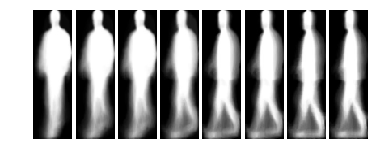

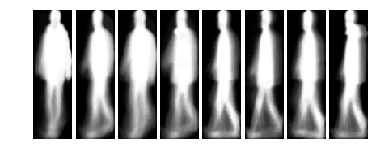

per con ang [2 2 2 2 2 2 2 2] 
 [3 3 3 3 3 3 3 3] 
 [1 2 2 3 4 4 5 5]
per con ang [60  2 16 34  2 19  2  0] 
 [3 3 3 3 3 3 3 3] 
 [1 3 2 3 5 4 6 5]


In [8]:
ran = range(400,408)
imshow_grid(pairs1[ran].squeeze(axis = -1))
imshow_grid(pairs2[ran].squeeze(axis = -1))
print("per con ang",pairs_label[ran,0,0],'\n',pairs_label[ran,0,1],'\n',pairs_label[ran,0,2])
print("per con ang",pairs_label[ran,1,0],'\n',pairs_label[ran,1,1],'\n',pairs_label[ran,1,2])

## Model

In [9]:
batch_size = 32
dim_feature = 512

class MNISTModel(object):
    """Simple MNIST domain adaptation model."""
    def __init__(self):
        self._build_model()
        
    def network(self,x, train_batch):
        W_conv0 = weight_variable([5, 5, 1, 32], name ='W0')
        b_conv0 = bias_variable([32], name = 'b0')
        h_conv0 = tf.nn.relu(batch_norm_layer((conv2d(x, W_conv0) + b_conv0), train_phase=train_batch,name ='bn0'))
        h_pool0 = max_pool_2x2(h_conv0) #160/2 =80  48/2 = 24

        W_conv1 = weight_variable([5, 5, 32, 48], name ='W1')
        b_conv1 = bias_variable([48], name = 'b1')
        h_conv1 = tf.nn.relu(batch_norm_layer((conv2d(h_pool0, W_conv1) + b_conv1), train_phase=train_batch,name ='bn1'))
        h_pool1 = max_pool_2x2(h_conv1) #80/2 =40 24/2 =12

        W_conv2 = weight_variable([5, 5, 48, 64], name ='W2')
        b_conv2 = bias_variable([64], name = 'b2')
        h_conv2 = tf.nn.relu(batch_norm_layer((conv2d(h_pool1, W_conv2) + b_conv2), train_phase=train_batch,name ='bn2'))
        h_pool2 = max_pool_2x2(h_conv2) #40/2 = 20  12/2 =6
        
#         W_conv3 = weight_variable([7, 7, 64, 128], name ='W3')
#         b_conv3 = bias_variable([128], name = 'b3')
#         h_conv3 = tf.nn.relu(batch_norm_layer((conv2d(h_pool2, W_conv3) + b_conv3), train_phase=train_batch,name ='bn3'))
#         h_pool3 = max_pool_2x2(h_conv3) #20/2 = 10  6/2 =3

        h_pool3_flat = tf.reshape(h_pool2, [-1, 20*6*64])
        W_fc1 = weight_variable([20*6*64, dim_feature], name ='W4')#前幾層的 padding 都是 smae 所以output 大小與原圖相同
        b_fc1 = bias_variable([dim_feature], name = 'b4')
        h_fc1 = tf.nn.relu(batch_norm_layer((tf.matmul(h_pool3_flat, W_fc1) + b_fc1),train_phase=train_batch,name ='bn3'))
#             h_fc1_drop = tf.nn.dropout(h_fc1, self.keep_prob)

        # The domain-invariant feature
        self.feature = tf.reshape(h_fc1, [-1, dim_feature])
        
        return self.feature

    
    def _build_model(self):
        self.X1 = tf.placeholder(tf.float32, [None, 160 ,48, 1])
        self.X2 = tf.placeholder(tf.float32, [None, 160 ,48, 1])
        self.y = tf.placeholder(tf.float32, [None, 1])
        self.domain = tf.placeholder(tf.float32, [None, 3])
        self.angle = tf.placeholder(tf.float32, [None, 11])
        self.l = tf.placeholder(tf.float32, [])
        self.useDomain = tf.placeholder(tf.bool, [])
        self.useAngle = tf.placeholder(tf.bool, [])
#         self.class_weight = tf.placeholder(tf.float32, [None, 3])
        self.train_batch = tf.placeholder(tf.bool, [])
#         self.keep_prob = tf.placeholder(tf.float32, [])
        
#         X1_input = (tf.cast(self.X1, tf.float32) - pixel_mean) / 255  #bug.
#         X2_input = (tf.cast(self.X2, tf.float32) - pixel_mean) / 255. #bug
#         X1_input = (tf.cast(self.X1, tf.float32)#bug.
#         X2_input = (tf.cast(self.X2, tf.float32)  #bug
        
        # CNN model for feature extraction
        with tf.variable_scope('feature_extraction') as scope:
            self.o1 = self.network(self.X1,self.train_batch)
            scope.reuse_variables()
            self.o2 = self.network(self.X2,self.train_batch)
            
 
        # MLP for class prediction
        with tf.variable_scope('contrastive-loss'):
            margin = 5
            self.d = tf.sqrt(tf.reduce_sum(tf.pow(self.o1-self.o2, 2), 1, keep_dims=True))
            tmp= self.y * tf.square(self.d)    
            tmp2 = (1 - self.y) * tf.square(tf.maximum((margin - self.d),0))
#             self.c_loss = tf.reduce_mean(tmp + tmp2) /2
            self.c_loss = (tf.reduce_mean(tmp + tmp2) /2)
            
#             c_W_fc0 = weight_variable([1, 1], name = 'c_w0')
#             c_b_fc0 = bias_variable([1], name = 'c_b0')
#             c_logits = tf.matmul(self.loss, c_W_fc0) + c_b_fc0
            
#             self.c_pred = tf.nn.sigmoid(c_logits)  #機率
#             self.c_pred_loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=c_logits, labels=self.y)
#            
        # Small MLP for domain prediction with adversarial loss
        with tf.variable_scope('domain_predictor'):
            # Flip the gradient when backpropagating through this operation
            feat = flip_gradient(self.o1, self.l)
            
            d_W_fc0 = weight_variable([dim_feature, 256], name = 'd_w0')
            d_b_fc0 = bias_variable([256], name = 'd_b0')
#             d_h_fc0 = tf.nn.relu(tf.matmul(feat, d_W_fc0) + d_b_fc0)
            d_h_fc0 = tf.nn.relu(batch_norm_layer((tf.matmul(feat, d_W_fc0) + d_b_fc0),train_phase=self.train_batch ,name ='bn0'))
                           
            d_W_fc1 = weight_variable([256, 64], name = 'd_w1')
            d_b_fc1 = bias_variable([64], name = 'd_b1')
#             d_h_fc1 = tf.nn.relu(tf.matmul(d_h_fc0, d_W_fc1) + d_b_fc1)
            d_h_fc1 = tf.nn.relu(batch_norm_layer((tf.matmul(d_h_fc0, d_W_fc1) + d_b_fc1),train_phase=self.train_batch ,name ='bn1'))
                           
            d_W_fc2 = weight_variable([64, 3], name = 'd_w2')
            d_b_fc2 = bias_variable([3], name = 'd_b2')
            d_logits = batch_norm_layer((tf.matmul(d_h_fc1, d_W_fc2) + d_b_fc2),train_phase=self.train_batch ,name ='bn2')
            
            
           
            self.domain_pred = tf.nn.softmax(d_logits)
#             self.domain_loss = tf.nn.softmax_cross_entropy_with_logits(logits=d_logits, labels=self.domain)
            self.domain_loss = tf.losses.softmax_cross_entropy(onehot_labels=self.domain, logits=d_logits)
#             self.domain_loss = 2.5*(self.domain_loss)

#             class_weights = tf.multiply(self.domain, self.class_weights)
#             self.domain_loss = tf.losses.softmax_cross_entropy(onehot_labels=class_weights,logits=d_logits)
        
        with tf.variable_scope('Angle_predictor'):
            # Flip the gradient when backpropagating through this operation
            feat = flip_gradient(self.o1, self.l)
            
            a_W_fc0 = weight_variable([dim_feature, 512], name = 'a_w0')
            a_b_fc0 = bias_variable([512], name = 'a_b0')
#             d_h_fc0 = tf.nn.relu(tf.matmul(feat, d_W_fc0) + d_b_fc0)
            a_h_fc0 = tf.nn.relu(batch_norm_layer((tf.matmul(feat, a_W_fc0) + a_b_fc0),train_phase=self.train_batch ,name ='bn0'))
                           
            a_W_fc1 = weight_variable([512, 256], name = 'a_w1')
            a_b_fc1 = bias_variable([256], name = 'a_b1')
#             d_h_fc1 = tf.nn.relu(tf.matmul(d_h_fc0, d_W_fc1) + d_b_fc1)
            a_h_fc1 = tf.nn.relu(batch_norm_layer((tf.matmul(a_h_fc0, a_W_fc1) + a_b_fc1),train_phase=self.train_batch ,name ='bn1'))
                           
            a_W_fc2 = weight_variable([256, 11], name = 'a_w2')
            a_b_fc2 = bias_variable([11], name = 'a_b2')
            a_logits = batch_norm_layer((tf.matmul(a_h_fc1, a_W_fc2) + a_b_fc2),train_phase=self.train_batch ,name ='bn2')
            
            
           
            self.angle_pred = tf.nn.softmax(a_logits)
#             self.domain_loss = tf.nn.softmax_cross_entropy_with_logits(logits=d_logits, labels=self.domain)
            self.angle_loss = tf.losses.softmax_cross_entropy(onehot_labels=self.angle, logits=a_logits, weights = 0.5)

In [10]:
# Build the model graph
graph = tf.get_default_graph()
with graph.as_default():
    model = MNISTModel()
    
    learning_rate = tf.placeholder(tf.float32, [])
    
    feature = model.o1
#     distance = model.d
    domain_prediction = model.domain_pred
    angle_prediction = model.angle_pred
    c_loss = tf.reduce_mean(model.c_loss)
    angle_loss = tf.reduce_mean(model.angle_loss)
    domain_loss = tf.reduce_mean(model.domain_loss)
    total_loss = c_loss + domain_loss + angle_loss

    train_op = tf.cond(model.useDomain, 
                lambda: tf.train.MomentumOptimizer(learning_rate, 0.9).minimize(total_loss),
                lambda: tf.train.MomentumOptimizer(learning_rate, 0.9).minimize(c_loss))
#         dann_train_op = tf.train.MomentumOptimizer(learning_rate, 0.9).minimize(total_loss)
#         regular_train_op = tf.train.MomentumOptimizer(learning_rate, 0.9).minimize(c_loss)
    
    
# Evaluation
#     correct_label_pred = tf.equal(tf.round(model.c_pred), model.y)
#     label_acc = tf.reduce_mean(tf.cast(correct_label_pred, tf.float32))
    correct_domain_pred = tf.equal(tf.argmax(model.domain, 1), tf.argmax(model.domain_pred, 1))
    domain_acc = tf.reduce_mean(tf.cast(correct_domain_pred, tf.float32))

    correct_angle_pred = tf.equal(tf.argmax(model.angle, 1), tf.argmax(model.angle_pred, 1))
    angle_acc = tf.reduce_mean(tf.cast(correct_angle_pred, tf.float32))

params_shape [Dimension(32)]
axises [0, 1, 2]
params_shape [Dimension(48)]
axises [0, 1, 2]
params_shape [Dimension(64)]
axises [0, 1, 2]
params_shape [Dimension(1024)]
axises [0]
params_shape [Dimension(32)]
axises [0, 1, 2]
params_shape [Dimension(48)]
axises [0, 1, 2]
params_shape [Dimension(64)]
axises [0, 1, 2]
params_shape [Dimension(1024)]
axises [0]
Instructions for updating:
keep_dims is deprecated, use keepdims instead
params_shape [Dimension(256)]
axises [0]
params_shape [Dimension(64)]
axises [0]
params_shape [Dimension(3)]
axises [0]
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

params_shape [Dimension(512)]
axises [0]
params_shape [Dimension(256)]
axises [0]
params_shape [Dimension(11)]
axises [0]


In [11]:
vs = tf.trainable_variables()
for v in vs:
    print (v)

<tf.Variable 'feature_extraction/W0:0' shape=(5, 5, 1, 32) dtype=float32_ref>
<tf.Variable 'feature_extraction/b0:0' shape=(32,) dtype=float32_ref>
<tf.Variable 'feature_extraction/bn0/beta:0' shape=(32,) dtype=float32_ref>
<tf.Variable 'feature_extraction/bn0/gamma:0' shape=(32,) dtype=float32_ref>
<tf.Variable 'feature_extraction/W1:0' shape=(5, 5, 32, 48) dtype=float32_ref>
<tf.Variable 'feature_extraction/b1:0' shape=(48,) dtype=float32_ref>
<tf.Variable 'feature_extraction/bn1/beta:0' shape=(48,) dtype=float32_ref>
<tf.Variable 'feature_extraction/bn1/gamma:0' shape=(48,) dtype=float32_ref>
<tf.Variable 'feature_extraction/W2:0' shape=(5, 5, 48, 64) dtype=float32_ref>
<tf.Variable 'feature_extraction/b2:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'feature_extraction/bn2/beta:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'feature_extraction/bn2/gamma:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'feature_extraction/W4:0' shape=(7680, 1024) dtype=float32_ref>
<tf.Variable 'feat

In [12]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(domain_labels[:,1]),
                                                 domain_labels[:,1])
# domain 0/1: bg [1,0] , 4/5:nm [0,1]
print(class_weights)
# y_integers = np.argmax(domain_labels_o, axis=1)
# class_weights = class_weight.compute_class_weight('balanced', np.unique(y_integers), y_integers)
# d_class_weights = dict(enumerate(class_weights))

domain_class_weight = np.multiply(domain_labels_o, class_weights)
print(domain_labels_o)
print(domain_class_weight)

# print(class_weights)
# print(np.unique(domain_labels_o))
# print(domain_labels_o)
# class_weight=[]

# def foo(somelist):
#     for x in somelist:
#         class_weight.append(class_weights[int(x)] )
#     return class_weight
# class_weight = foo(domain_labels_o[:,0])
# class_weight = np.array(class_weight)
# print(len(class_weight), len(domain_labels_o[:,0]))

[1.49099485 1.44754371 0.61032122]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[1.49099485 0.         0.        ]
 [1.49099485 0.         0.        ]
 [1.49099485 0.         0.        ]
 ...
 [0.         0.         0.61032122]
 [0.         0.         0.61032122]
 [0.         0.         0.61032122]]


In [13]:
def return_modelpath(model_name='ex'):
    dirpath = 'model_all_domain/'+ model_name
    if not os.path.isdir(dirpath):
            os.mkdir(dirpath)
    filepath = dirpath + '/'+ model_name  +'.ckpt'
    return dirpath

# train

In [14]:
def train_and_evaluate(training_mode, graph, model, epoches=10, verbose=True, use_model=True, model_name='50epoch_False'):#num_steps=50
    """Helper to run the model with different training modes."""

    with tf.Session(graph=graph) as sess:
        saver = tf.train.Saver()
        tf.global_variables_initializer().run()
        
        # Batch generators
#         gen_batch = batch_generator2(
#             [pairs1, pairs2, same_pair, domain_labels_o], batch_size )
        gen_batch = batch_generator2(
            [pairs1, pairs2, same_pair, domain_class_weight, angle_labels_o], batch_size )

        history = {'train loss':[], 'val loss':[], 'train dloss':[], 'val dloss':[], 
                   'train closs':[], 'val closs':[], 'train dacc':[], 'val dacc':[],
                   'train aloss':[], 'val aloss':[], 'train aacc':[], 'val aacc':[]}
        every_batch = []
        num_steps = int(math.ceil(len(pairs1)/batch_size))

        # Training loop
        for i in range(epoches): 
            for j in range(num_steps):
                # Adaptation param and learning rate schedule as described in the paper
                p = float(i) / num_steps
                l = 2. / (1. + np.exp(-10. * p)) - 1
                lr = 0.001 / (1. + 10 * p)**0.75
    #             keep_ratio = 0.7

                # Training step
                if training_mode == 'dann':

                    b_pairs1, b_pairs2, b_same_pair, b_domain_labels_o, b_angle_labels_o = next(gen_batch)

                    _, batch_loss, dloss, closs, dacc, dpred, aloss, aacc = sess.run(
                        [train_op, total_loss, domain_loss, 
                         c_loss, domain_acc, domain_prediction,
                         angle_loss, angle_acc],
                        feed_dict={model.X1: b_pairs1 ,model.X2: b_pairs2, 
                                   model.y: b_same_pair, model.domain: b_domain_labels_o,
                                   model.angle : b_angle_labels_o,
                                   model.train_batch: True,
                                   model.useDomain: use_model, model.l: l, learning_rate: lr})
                    every_batch.append([batch_loss, dloss, closs, dacc, aloss, aacc ])
                    
                    if verbose and (j+1) % 20 == 0:
                        print('j: {}/{} loss: {:8.4f} d_loss: {:8.4f} c_loss: {:8.4f} d_acc: {:8.4f} a_loss: {:8.4f} a_acc: {:8.4f}'.format(
                                 j+1,num_steps,batch_loss, dloss, closs ,dacc, aloss, aacc))
                    if ((i+1) %10 ==0) & (j ==0):
                        print('dpred: {}'.format( dpred[:16] ))
#                         print('j: {} loss: {}  d_acc: {}  d_loss: {} c_loss: {}   l: {}  lr: {}'.format(
#                                  j,batch_loss, d_acc, dloss, closs, l, lr))
            epoch_avg = np.average(np.array(every_batch), axis=0)
            history['train loss'].append(epoch_avg[0])
            history['train dloss'].append(epoch_avg[1])
            history['train closs'].append(epoch_avg[2])
            history['train dacc'].append(epoch_avg[3])
            history['train aloss'].append(epoch_avg[4])
            history['train aacc'].append(epoch_avg[5])
            print('epoch: {} tr_loss: {:8.4f} tr_dloss: {:8.4f} tr_closs: {:8.4f} tr_dacc: {:8.4f} tr_aloss: {:8.4f} tr_aacc: {:8.4f}'.format(
                                i+1,epoch_avg[0], epoch_avg[1], epoch_avg[2],epoch_avg[3], epoch_avg[4],epoch_avg[5]))
            
            val_loss, val_dloss, val_closs, val_dacc, val_aloss, val_aacc = sess.run( 
                                [total_loss, domain_loss, c_loss, domain_acc, angle_loss, angle_acc],
                                feed_dict={ model.X1: pairs1_val ,
                                        model.X2: pairs2_val, 
                                        model.y: same_pair_val,
                                        model.train_batch: False,
                                        model.domain: domain_labels_o_val,
                                        model.angle: angle_labels_o_val,
                                        model.l: 1.0})
            history['val loss'].append(val_loss)
            history['val dloss'].append(val_dloss)
            history['val closs'].append(val_closs)
            history['val dacc'].append(val_dacc)
            history['val aloss'].append(val_aloss)
            history['val aacc'].append(val_aacc)
            if verbose :
                print('epoch: {} val_loss: {:8.4f} val_dloss: {:8.4f} val_closs: {:8.4f} val_dacc: {:8.4f} val_aloss: {:8.4f} val_aacc: {:8.4f}\n'.format(
                                i+1,val_loss, val_dloss, val_closs,val_dacc, val_aloss,val_aacc))
        
        saver.save(sess, return_modelpath(model_name) + '/' + model_name + 'ckpt')
        print('evaluate phase')                                 
        end_val_loss, end_val_dloss, end_val_closs, end_val_dacc, end_val_aloss, end_val_aacc = sess.run(
                                [total_loss, domain_loss, c_loss, domain_acc, angle_loss, angle_acc],
                                feed_dict={ model.X1: pairs1_val ,
                                        model.X2: pairs2_val, 
                                        model.y: same_pair_val,
                                        model.train_batch: False,
                                        model.domain: domain_labels_o_val, 
                                        model.angle: angle_labels_o_val,
                                        model.l: 1.0})
        print('end_val_loss: {} end_val_dloss: {} end_val_closs: {} end_val_dacc: {} val_aloss: {} val_aacc: {}'.format(
                                end_val_loss, end_val_dloss, end_val_closs, end_val_dacc, end_val_aloss, end_val_aacc ))
        
        test_batch_size = int(math.ceil(len(X_test)/5 ))
        print(test_batch_size)
        num_steps = 5
        X_test_emd =[]
        X_test_emd = np.array(X_test_emd).reshape(0,dim_feature)
        gentest_batch = batch_generator2([X_test], test_batch_size, shuffle = False )
        for z in range(num_steps):
            b_X_test = next(gentest_batch)
            b_X_test_emd = sess.run(feature, feed_dict={model.X1: b_X_test[0], model.train_batch: False}) 
            X_test_emd = np.vstack([X_test_emd, b_X_test_emd])
        print(X_test_emd[0])
        
        
    return X_test_emd, history 



print('\nDomain adaptation training')
use_model = True
t = time.strftime("%m%d_%H%M", time.localtime())
model_name = '50epoch_True_Angle_wider'+ t
X_emd_test, his = train_and_evaluate('dann', graph, model,epoches = 50 ,use_model= use_model,model_name=model_name)
print( X_emd_test.shape )


Domain adaptation training
j: 20/326 loss:  27.8738 d_loss:   1.0953 c_loss:  25.8099 d_acc:   0.4062 a_loss:   0.9686 a_acc:   0.2812
j: 40/326 loss:  17.6160 d_loss:   0.9684 c_loss:  15.7415 d_acc:   0.5312 a_loss:   0.9061 a_acc:   0.3125
j: 60/326 loss:  36.0017 d_loss:   0.8283 c_loss:  34.2429 d_acc:   0.5938 a_loss:   0.9305 a_acc:   0.3438
j: 80/326 loss:  21.9266 d_loss:   0.8650 c_loss:  20.1451 d_acc:   0.6875 a_loss:   0.9165 a_acc:   0.4688
j: 100/326 loss:  13.7534 d_loss:   0.6224 c_loss:  12.2834 d_acc:   0.7500 a_loss:   0.8476 a_acc:   0.3750
j: 120/326 loss:  43.1138 d_loss:   0.7619 c_loss:  41.3411 d_acc:   0.6250 a_loss:   1.0108 a_acc:   0.1562
j: 140/326 loss:   9.6521 d_loss:   0.6453 c_loss:   8.2388 d_acc:   0.6875 a_loss:   0.7680 a_acc:   0.4062
j: 160/326 loss:  14.9602 d_loss:   1.0060 c_loss:  13.0867 d_acc:   0.5000 a_loss:   0.8675 a_acc:   0.4062
j: 180/326 loss:   5.6073 d_loss:   0.8025 c_loss:   3.7662 d_acc:   0.7812 a_loss:   1.0386 a_acc:   0.

j: 80/326 loss:   5.3467 d_loss:   1.0468 c_loss:   3.2710 d_acc:   0.5312 a_loss:   1.0289 a_acc:   0.1562
j: 100/326 loss:   5.9595 d_loss:   1.0967 c_loss:   3.9783 d_acc:   0.5000 a_loss:   0.8844 a_acc:   0.2812
j: 120/326 loss:   3.2150 d_loss:   0.9999 c_loss:   1.2969 d_acc:   0.6250 a_loss:   0.9181 a_acc:   0.3125
j: 140/326 loss:   3.5698 d_loss:   1.1455 c_loss:   1.5061 d_acc:   0.3750 a_loss:   0.9182 a_acc:   0.3125
j: 160/326 loss:   3.6788 d_loss:   0.8879 c_loss:   1.8351 d_acc:   0.5625 a_loss:   0.9558 a_acc:   0.1875
j: 180/326 loss:   3.0657 d_loss:   1.0300 c_loss:   1.1297 d_acc:   0.5625 a_loss:   0.9060 a_acc:   0.1875
j: 200/326 loss:   4.0561 d_loss:   0.9338 c_loss:   2.2520 d_acc:   0.5312 a_loss:   0.8704 a_acc:   0.2812
j: 220/326 loss:   4.6224 d_loss:   1.0429 c_loss:   2.7635 d_acc:   0.5000 a_loss:   0.8160 a_acc:   0.4375
j: 240/326 loss:   3.3500 d_loss:   0.7649 c_loss:   1.7195 d_acc:   0.5938 a_loss:   0.8656 a_acc:   0.3438
j: 260/326 loss:   5

j: 140/326 loss:   3.0682 d_loss:   0.9730 c_loss:   1.1429 d_acc:   0.5625 a_loss:   0.9524 a_acc:   0.2812
j: 160/326 loss:   3.4786 d_loss:   1.0079 c_loss:   1.5585 d_acc:   0.5312 a_loss:   0.9122 a_acc:   0.1875
j: 180/326 loss:   4.0874 d_loss:   1.2050 c_loss:   1.9355 d_acc:   0.2812 a_loss:   0.9469 a_acc:   0.2188
j: 200/326 loss:   3.7406 d_loss:   1.0629 c_loss:   1.5942 d_acc:   0.5000 a_loss:   1.0835 a_acc:   0.1250
j: 220/326 loss:   4.2216 d_loss:   0.9574 c_loss:   2.4471 d_acc:   0.5000 a_loss:   0.8172 a_acc:   0.3438
j: 240/326 loss:   3.3717 d_loss:   1.0169 c_loss:   1.4993 d_acc:   0.3750 a_loss:   0.8555 a_acc:   0.3438
j: 260/326 loss:   3.8381 d_loss:   0.9947 c_loss:   1.8504 d_acc:   0.3438 a_loss:   0.9931 a_acc:   0.1562
j: 280/326 loss:   3.4715 d_loss:   1.0761 c_loss:   1.4305 d_acc:   0.3750 a_loss:   0.9649 a_acc:   0.1562
j: 300/326 loss:   3.2388 d_loss:   0.9825 c_loss:   1.2272 d_acc:   0.4375 a_loss:   1.0291 a_acc:   0.1875
j: 320/326 loss:   

j: 80/326 loss:   4.2565 d_loss:   1.0395 c_loss:   2.1643 d_acc:   0.4062 a_loss:   1.0527 a_acc:   0.2812
j: 100/326 loss:   5.2137 d_loss:   0.9494 c_loss:   3.2113 d_acc:   0.4688 a_loss:   1.0530 a_acc:   0.2812
j: 120/326 loss:   4.0368 d_loss:   1.1607 c_loss:   1.9578 d_acc:   0.4688 a_loss:   0.9183 a_acc:   0.2812
j: 140/326 loss:   4.2574 d_loss:   1.2186 c_loss:   1.9874 d_acc:   0.3750 a_loss:   1.0514 a_acc:   0.2188
j: 160/326 loss:   3.4825 d_loss:   0.9722 c_loss:   1.3509 d_acc:   0.4375 a_loss:   1.1595 a_acc:   0.2500
j: 180/326 loss:   2.9049 d_loss:   0.9021 c_loss:   0.9638 d_acc:   0.5000 a_loss:   1.0390 a_acc:   0.3438
j: 200/326 loss:   3.0957 d_loss:   1.1121 c_loss:   1.0882 d_acc:   0.5000 a_loss:   0.8953 a_acc:   0.3125
j: 220/326 loss:   3.1003 d_loss:   0.9605 c_loss:   1.0559 d_acc:   0.3750 a_loss:   1.0840 a_acc:   0.1250
j: 240/326 loss:   3.3523 d_loss:   0.9137 c_loss:   1.1817 d_acc:   0.5312 a_loss:   1.2569 a_acc:   0.0938
j: 260/326 loss:   3

j: 140/326 loss:   3.4626 d_loss:   1.1729 c_loss:   1.1734 d_acc:   0.3750 a_loss:   1.1162 a_acc:   0.1562
j: 160/326 loss:   3.7552 d_loss:   0.9205 c_loss:   1.9258 d_acc:   0.5000 a_loss:   0.9089 a_acc:   0.4062
j: 180/326 loss:   3.1933 d_loss:   1.0644 c_loss:   1.0399 d_acc:   0.2500 a_loss:   1.0890 a_acc:   0.0938
j: 200/326 loss:   3.4720 d_loss:   0.9364 c_loss:   1.4538 d_acc:   0.4688 a_loss:   1.0819 a_acc:   0.2188
j: 220/326 loss:   3.4233 d_loss:   1.1804 c_loss:   1.1413 d_acc:   0.5312 a_loss:   1.1016 a_acc:   0.1562
j: 240/326 loss:   3.1136 d_loss:   1.0824 c_loss:   0.9809 d_acc:   0.3438 a_loss:   1.0502 a_acc:   0.2188
j: 260/326 loss:   2.8183 d_loss:   0.9362 c_loss:   0.7574 d_acc:   0.4062 a_loss:   1.1247 a_acc:   0.2188
j: 280/326 loss:   3.0034 d_loss:   0.9952 c_loss:   0.9476 d_acc:   0.3750 a_loss:   1.0606 a_acc:   0.1875
j: 300/326 loss:   3.6494 d_loss:   1.0646 c_loss:   1.5119 d_acc:   0.4375 a_loss:   1.0730 a_acc:   0.1250
j: 320/326 loss:   

j: 80/326 loss:   3.1259 d_loss:   0.9527 c_loss:   0.9805 d_acc:   0.5312 a_loss:   1.1927 a_acc:   0.1562
j: 100/326 loss:   3.3784 d_loss:   1.0729 c_loss:   1.2034 d_acc:   0.5000 a_loss:   1.1021 a_acc:   0.1562
j: 120/326 loss:   3.7540 d_loss:   1.0337 c_loss:   1.5011 d_acc:   0.4062 a_loss:   1.2192 a_acc:   0.1250
j: 140/326 loss:   3.2717 d_loss:   1.0459 c_loss:   1.1563 d_acc:   0.2812 a_loss:   1.0695 a_acc:   0.2500
j: 160/326 loss:   3.2064 d_loss:   1.0358 c_loss:   1.0334 d_acc:   0.4375 a_loss:   1.1372 a_acc:   0.1562
j: 180/326 loss:   3.3626 d_loss:   1.2338 c_loss:   1.0620 d_acc:   0.4375 a_loss:   1.0667 a_acc:   0.3438
j: 200/326 loss:   3.3584 d_loss:   1.1434 c_loss:   1.0487 d_acc:   0.5000 a_loss:   1.1663 a_acc:   0.0938
j: 220/326 loss:   3.2955 d_loss:   0.8831 c_loss:   1.3380 d_acc:   0.5625 a_loss:   1.0744 a_acc:   0.2188
j: 240/326 loss:   4.2373 d_loss:   1.2749 c_loss:   1.8523 d_acc:   0.3750 a_loss:   1.1101 a_acc:   0.2500
j: 260/326 loss:   3

j: 140/326 loss:   2.7615 d_loss:   0.9904 c_loss:   0.6604 d_acc:   0.5625 a_loss:   1.1106 a_acc:   0.0625
j: 160/326 loss:   2.8349 d_loss:   0.9982 c_loss:   0.7411 d_acc:   0.3750 a_loss:   1.0956 a_acc:   0.0938
j: 180/326 loss:   2.9736 d_loss:   1.1353 c_loss:   0.7085 d_acc:   0.3438 a_loss:   1.1298 a_acc:   0.0938
j: 200/326 loss:   3.1279 d_loss:   0.9049 c_loss:   1.0591 d_acc:   0.3750 a_loss:   1.1638 a_acc:   0.0938
j: 220/326 loss:   3.0478 d_loss:   1.0616 c_loss:   0.8881 d_acc:   0.4062 a_loss:   1.0981 a_acc:   0.2188
j: 240/326 loss:   3.2539 d_loss:   1.1272 c_loss:   1.0190 d_acc:   0.3438 a_loss:   1.1076 a_acc:   0.1562
j: 260/326 loss:   3.9998 d_loss:   0.9473 c_loss:   1.9574 d_acc:   0.4375 a_loss:   1.0950 a_acc:   0.1250
j: 280/326 loss:   3.5964 d_loss:   1.0444 c_loss:   1.3622 d_acc:   0.2500 a_loss:   1.1898 a_acc:   0.0938
j: 300/326 loss:   3.4065 d_loss:   1.0127 c_loss:   1.2744 d_acc:   0.3750 a_loss:   1.1194 a_acc:   0.2500
j: 320/326 loss:   

j: 200/326 loss:   3.4458 d_loss:   1.1782 c_loss:   1.0893 d_acc:   0.3438 a_loss:   1.1782 a_acc:   0.1875
j: 220/326 loss:   2.9179 d_loss:   0.9855 c_loss:   0.7394 d_acc:   0.2812 a_loss:   1.1930 a_acc:   0.0938
j: 240/326 loss:   3.1540 d_loss:   1.1011 c_loss:   0.9359 d_acc:   0.3438 a_loss:   1.1170 a_acc:   0.1875
j: 260/326 loss:   3.7688 d_loss:   1.0523 c_loss:   1.5812 d_acc:   0.4062 a_loss:   1.1354 a_acc:   0.1562
j: 280/326 loss:   3.3882 d_loss:   0.9468 c_loss:   1.3091 d_acc:   0.4688 a_loss:   1.1324 a_acc:   0.1875
j: 300/326 loss:   3.3478 d_loss:   1.1752 c_loss:   1.0705 d_acc:   0.1875 a_loss:   1.1021 a_acc:   0.0938
j: 320/326 loss:   3.1922 d_loss:   1.0726 c_loss:   0.8929 d_acc:   0.4062 a_loss:   1.2267 a_acc:   0.0312
epoch: 29 tr_loss:   4.1849 tr_dloss:   1.0172 tr_closs:   2.1416 tr_dacc:   0.4529 tr_aloss:   1.0260 tr_aacc:   0.2281
epoch: 29 val_loss:   3.0555 val_dloss:   1.0575 val_closs:   0.8651 val_dacc:   0.3909 val_aloss:   1.1329 val_aacc

j: 140/326 loss:   2.8819 d_loss:   1.0322 c_loss:   0.6950 d_acc:   0.4062 a_loss:   1.1547 a_acc:   0.1875
j: 160/326 loss:   3.5686 d_loss:   0.9976 c_loss:   1.3943 d_acc:   0.2812 a_loss:   1.1766 a_acc:   0.1875
j: 180/326 loss:   3.5975 d_loss:   1.1125 c_loss:   1.3550 d_acc:   0.1562 a_loss:   1.1300 a_acc:   0.1875
j: 200/326 loss:   3.0513 d_loss:   1.0218 c_loss:   0.9643 d_acc:   0.3125 a_loss:   1.0652 a_acc:   0.2500
j: 220/326 loss:   3.0327 d_loss:   1.1537 c_loss:   0.7545 d_acc:   0.3438 a_loss:   1.1246 a_acc:   0.0938
j: 240/326 loss:   3.0420 d_loss:   1.0583 c_loss:   0.8790 d_acc:   0.4375 a_loss:   1.1047 a_acc:   0.1562
j: 260/326 loss:   3.0134 d_loss:   0.9925 c_loss:   0.8290 d_acc:   0.4688 a_loss:   1.1919 a_acc:   0.1250
j: 280/326 loss:   2.7507 d_loss:   0.8928 c_loss:   0.7357 d_acc:   0.4062 a_loss:   1.1222 a_acc:   0.2188
j: 300/326 loss:   3.4951 d_loss:   1.1617 c_loss:   1.1911 d_acc:   0.3750 a_loss:   1.1423 a_acc:   0.1250
j: 320/326 loss:   

j: 200/326 loss:   3.2808 d_loss:   1.1715 c_loss:   0.9508 d_acc:   0.4062 a_loss:   1.1585 a_acc:   0.2188
j: 220/326 loss:   2.9213 d_loss:   1.2308 c_loss:   0.5190 d_acc:   0.4688 a_loss:   1.1715 a_acc:   0.0625
j: 240/326 loss:   3.6168 d_loss:   1.0542 c_loss:   1.3881 d_acc:   0.3438 a_loss:   1.1744 a_acc:   0.1562
j: 260/326 loss:   3.6390 d_loss:   1.2208 c_loss:   1.3134 d_acc:   0.4062 a_loss:   1.1048 a_acc:   0.1875
j: 280/326 loss:   3.0568 d_loss:   0.9468 c_loss:   0.9627 d_acc:   0.3438 a_loss:   1.1473 a_acc:   0.1562
j: 300/326 loss:   3.3684 d_loss:   1.3041 c_loss:   1.0021 d_acc:   0.2812 a_loss:   1.0621 a_acc:   0.2500
j: 320/326 loss:   2.9128 d_loss:   0.9799 c_loss:   0.7862 d_acc:   0.4062 a_loss:   1.1466 a_acc:   0.0625
epoch: 37 tr_loss:   3.9715 tr_dloss:   1.0306 tr_closs:   1.8904 tr_dacc:   0.4358 tr_aloss:   1.0506 tr_aacc:   0.2135
epoch: 37 val_loss:   3.0233 val_dloss:   1.0696 val_closs:   0.7842 val_dacc:   0.3909 val_aloss:   1.1695 val_aacc

j: 140/326 loss:   3.3416 d_loss:   1.0433 c_loss:   1.1415 d_acc:   0.4375 a_loss:   1.1568 a_acc:   0.1250
j: 160/326 loss:   2.8785 d_loss:   1.1347 c_loss:   0.5637 d_acc:   0.4062 a_loss:   1.1800 a_acc:   0.1250
j: 180/326 loss:   2.7908 d_loss:   0.9946 c_loss:   0.7488 d_acc:   0.5000 a_loss:   1.0474 a_acc:   0.2188
j: 200/326 loss:   3.3130 d_loss:   1.2701 c_loss:   0.9162 d_acc:   0.4062 a_loss:   1.1267 a_acc:   0.1875
j: 220/326 loss:   3.1570 d_loss:   1.0131 c_loss:   0.9699 d_acc:   0.4062 a_loss:   1.1741 a_acc:   0.2188
j: 240/326 loss:   2.9847 d_loss:   1.0496 c_loss:   0.8199 d_acc:   0.2500 a_loss:   1.1152 a_acc:   0.1875
j: 260/326 loss:   3.3668 d_loss:   1.1449 c_loss:   1.0975 d_acc:   0.3750 a_loss:   1.1244 a_acc:   0.1562
j: 280/326 loss:   3.3300 d_loss:   0.9934 c_loss:   1.2100 d_acc:   0.3438 a_loss:   1.1267 a_acc:   0.2188
j: 300/326 loss:   3.5803 d_loss:   1.0297 c_loss:   1.3553 d_acc:   0.5625 a_loss:   1.1952 a_acc:   0.1250
j: 320/326 loss:   

j: 200/326 loss:   3.1058 d_loss:   1.1596 c_loss:   0.7372 d_acc:   0.3125 a_loss:   1.2090 a_acc:   0.1562
j: 220/326 loss:   3.0075 d_loss:   1.0445 c_loss:   0.7770 d_acc:   0.3438 a_loss:   1.1860 a_acc:   0.1250
j: 240/326 loss:   2.9113 d_loss:   0.9983 c_loss:   0.8541 d_acc:   0.4375 a_loss:   1.0589 a_acc:   0.2188
j: 260/326 loss:   3.6118 d_loss:   1.1666 c_loss:   1.3172 d_acc:   0.4375 a_loss:   1.1280 a_acc:   0.0625
j: 280/326 loss:   3.1887 d_loss:   1.2382 c_loss:   0.7362 d_acc:   0.4062 a_loss:   1.2143 a_acc:   0.1250
j: 300/326 loss:   3.3618 d_loss:   0.9799 c_loss:   1.2116 d_acc:   0.4062 a_loss:   1.1702 a_acc:   0.0625
j: 320/326 loss:   3.3855 d_loss:   1.2067 c_loss:   1.0168 d_acc:   0.5000 a_loss:   1.1620 a_acc:   0.0938
epoch: 45 tr_loss:   3.8183 tr_dloss:   1.0399 tr_closs:   1.7109 tr_dacc:   0.4233 tr_aloss:   1.0675 tr_aacc:   0.2035
epoch: 45 val_loss:   3.0301 val_dloss:   1.0865 val_closs:   0.7886 val_dacc:   0.3796 val_aloss:   1.1550 val_aacc

j: 260/326 loss:   3.1029 d_loss:   0.9414 c_loss:   0.9990 d_acc:   0.6250 a_loss:   1.1625 a_acc:   0.1875
j: 280/326 loss:   3.1226 d_loss:   1.0472 c_loss:   0.8238 d_acc:   0.3750 a_loss:   1.2516 a_acc:   0.0312
j: 300/326 loss:   2.9629 d_loss:   1.0491 c_loss:   0.7330 d_acc:   0.3438 a_loss:   1.1808 a_acc:   0.1562
j: 320/326 loss:   3.0335 d_loss:   1.0123 c_loss:   0.8706 d_acc:   0.5312 a_loss:   1.1506 a_acc:   0.1875
epoch: 49 tr_loss:   3.7583 tr_dloss:   1.0434 tr_closs:   1.6404 tr_dacc:   0.4200 tr_aloss:   1.0745 tr_aacc:   0.1992
epoch: 49 val_loss:   3.0500 val_dloss:   1.0755 val_closs:   0.7628 val_dacc:   0.4142 val_aloss:   1.2117 val_aacc:   0.1113

dpred: [[0.28969592 0.4462055  0.2640986 ]
 [0.27811208 0.47968432 0.24220358]
 [0.2503232  0.36647102 0.3832058 ]
 [0.3366226  0.41020507 0.25317237]
 [0.29056537 0.4344622  0.27497253]
 [0.29822809 0.38677934 0.31499252]
 [0.33797795 0.30733913 0.3546829 ]
 [0.37401643 0.35028276 0.27570087]
 [0.3565007  0.35439

# load model

In [ ]:
def load_model(model_name):
    with tf.Session(graph=graph) as sess:
        saver = tf.train.Saver()
        tf.global_variables_initializer().run()
        
        saver.restore(sess, return_modelpath(model_name) + '/' + model_name + 'ckpt')
        print('already load model')
        test_batch_size = int(math.ceil(len(X_test)/5 ))
        print('X_test',len(X_test))
        print('test_batch_size',test_batch_size)
        num_steps = 5
        X_test_emd =[]
        X_test_emd = np.array(X_test_emd).reshape(0,dim_feature)
        gentest_batch = batch_generator2([X_test], test_batch_size, shuffle = False )
        for z in range(num_steps):
            b_X_test = next(gentest_batch)
            b_X_test_emd = sess.run(feature, feed_dict={model.X1: b_X_test[0], model.train_batch: False}) 
            X_test_emd = np.vstack([X_test_emd, b_X_test_emd])
        print(X_test_emd[0])
    return  X_test_emd

model_name = '40epoch_True_weight2.50116_0908'
# X_emd_test = load_model(model_name)
X_emd_test = load_model(model_name )

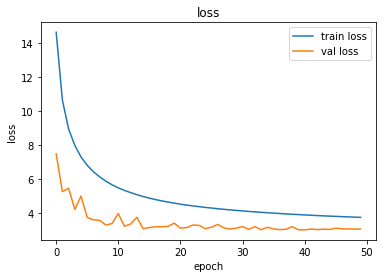

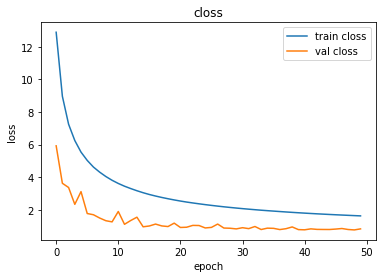

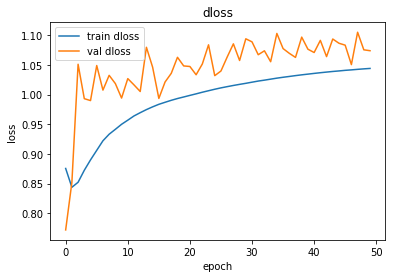

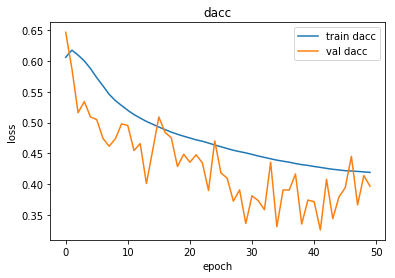

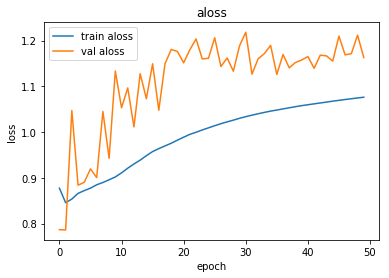

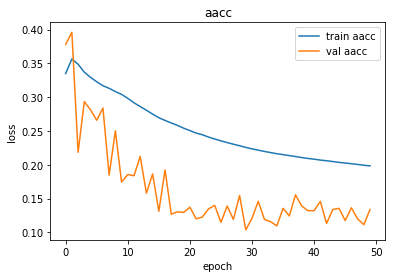

In [15]:
def draw_loss(history,model_name,w = 'closs'):
    plt.plot(history['train '+w])
    plt.plot(history['val '+w])
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend(['train '+w,'val '+w])
    plt.title(w)
    plt.savefig(return_modelpath(model_name)+'/'+w+'.jpg')
    plt.show()
    plt.close()   
    
draw_loss(his,model_name,w = 'loss')
draw_loss(his,model_name,w = 'closs')
draw_loss(his,model_name,w = 'dloss')
draw_loss(his,model_name,w = 'dacc')
draw_loss(his,model_name,w = 'aloss')
draw_loss(his,model_name,w = 'aacc')

# KNN

In [ ]:
model_name

In [16]:
def pgset(X_test, y_test, probe_condition):
    print("X_test",len(X_test))
    bool_nm = ((y_test[:,1]>3)*(y_test[:,1]<8)) # nm1234
    X_gallery = X_test[np.where(bool_nm)[0]]
    y_gallery = y_test[np.where(bool_nm)[0]]
    unique, counts = np.unique(y_gallery[:,0], return_counts=True)
    print("persons",len(unique.tolist()))
    print("gallery = ",dict(zip(unique, counts)))
    if( probe_condition =='cl'):
        print("in CL")
        bool_CL = (y_test[:,1]>=2)*(y_test[:,1]<=3) # CL0102
        X_probe = X_test[np.where(bool_CL)[0]]
        y_probe = y_test[np.where(bool_CL)[0]]
    elif( probe_condition =='nm'):
        print('in NM')
        bool_nm2 = (y_test[:,1]>7)*(y_test[:,1]<10) # nm05~06
        X_probe = X_test[np.where(bool_nm2)[0]]
        y_probe = y_test[np.where(bool_nm2)[0]]
    elif(probe_condition =='bg'):
        print('in bg')
        bool_bg = (y_test[:,1]>=0)*(y_test[:,1]<2) # bg0102
        X_probe = X_test[np.where(bool_bg)[0]]
        y_probe = y_test[np.where(bool_bg)[0]]
    elif(probe_condition =='all'):
        print('in ALL')
        X_probe = X_test[np.where(~bool_nm)[0]]
        y_probe = y_test[np.where(~bool_nm)[0]]
    elif(probe_condition =='nm&bg'):
        print('in two')
        bool_ = (y_test[:,1]>7)*(y_test[:,1]<10)|(y_test[:,1]>=0)*(y_test[:,1]<2)
        X_probe = X_test[np.where(bool_)[0]]
        y_probe = y_test[np.where(bool_)[0]]
    elif(probe_condition =='nm&cl'):
        print('in two')
        bool_ = (y_test[:,1]>7)*(y_test[:,1]<10)|(y_test[:,1]>=2)*(y_test[:,1]<4)
        X_probe = X_test[np.where(bool_)[0]]
        y_probe = y_test[np.where(bool_)[0]]
    unique, counts = np.unique(y_probe[:,0], return_counts=True)
    print("persons",len(unique.tolist()))
    print("probe= ",dict(zip(unique, counts)))
    return X_gallery, y_gallery, X_probe, y_probe



In [17]:
def knnRecognition(X_gallery , X_probe, y_gallery, y_probe, probe_condition,model_name):
            
    gait_X_train = X_gallery
    gait_X_test = X_probe
    print('shape_gallery ',gait_X_train.shape)
    print('shape_probe ',gait_X_test.shape)
    gait_Y_train = y_gallery[:,0].reshape(-1,1)
    gait_Y_test = y_probe[:,0].reshape(-1,1)
    print(gait_Y_train.shape)

    k_list = list(range(2,10,1))
    s_best = 0
    k_best = 0
    for k in k_list:
        knn = KNeighborsClassifier(n_neighbors=k, n_jobs= 6)
        knn.fit(gait_X_train, gait_Y_train)
        s = knn.score(gait_X_test, gait_Y_test)
        print("k=",k,"score=",s)
        if(s_best < s):
            s_best = s
            k_best = k
    print("k_best",k_best) 

    knn_best = KNeighborsClassifier(n_neighbors = k_best, n_jobs = 6) #weights ='distance', algorithm='ball_tree'
    knn_best.fit(gait_X_train, gait_Y_train)
    gait_Y_test_pred = knn_best.predict(gait_X_test).reshape(-1,1)
    cm1 = confusion_matrix(gait_Y_test, gait_Y_test_pred) 
    s_te = knn_best.score(gait_X_test, gait_Y_test)
    print('cm\n',cm1)
    print('score_test',s_te)
    
    with open(return_modelpath(model_name) + '/log.txt' ,'a') as fh:
        fh.write(probe_condition+'='+str(s_te)+'\n')
    return s_te


probe_list = ['nm','bg','cl']
prob_acc = []
for probe in probe_list:
    X_gallery, y_gallery, X_probe, y_probe = pgset(X_emd_test, y_test, probe)
    se_knn = knnRecognition(X_gallery , X_probe, y_gallery, y_probe, probe,model_name)
    prob_acc.append(se_knn)

X_test 6754
persons 62
gallery =  {62: 44, 63: 44, 64: 44, 65: 44, 66: 33, 67: 33, 68: 44, 69: 44, 70: 44, 71: 44, 72: 44, 73: 44, 74: 44, 75: 44, 76: 44, 77: 44, 78: 44, 79: 44, 80: 44, 81: 44, 82: 44, 83: 44, 84: 44, 85: 44, 86: 44, 87: 35, 88: 44, 89: 44, 90: 44, 91: 44, 92: 44, 93: 44, 94: 44, 95: 44, 96: 44, 97: 44, 98: 44, 99: 44, 100: 44, 101: 44, 102: 44, 103: 44, 104: 44, 105: 44, 106: 44, 107: 44, 108: 40, 109: 44, 110: 44, 111: 44, 112: 44, 113: 44, 114: 44, 115: 44, 116: 44, 117: 44, 118: 44, 119: 44, 120: 44, 121: 44, 122: 44, 123: 44}
in NM
persons 61
probe=  {62: 22, 63: 22, 64: 22, 65: 22, 67: 15, 68: 22, 69: 22, 70: 22, 71: 22, 72: 22, 73: 22, 74: 22, 75: 22, 76: 22, 77: 22, 78: 22, 79: 22, 80: 22, 81: 22, 82: 22, 83: 22, 84: 22, 85: 22, 86: 22, 87: 22, 88: 22, 89: 22, 90: 22, 91: 22, 92: 22, 93: 22, 94: 22, 95: 22, 96: 22, 97: 22, 98: 22, 99: 22, 100: 22, 101: 22, 102: 22, 103: 22, 104: 22, 105: 22, 106: 22, 107: 22, 108: 22, 109: 22, 110: 22, 111: 22, 112: 22, 113: 2

/home/deep3072/anaconda2/envs/py36_ting_cv/lib/python3.6/site-packages/ipykernel/__main__.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


k= 2 score= 0.9213483146067416
k= 3 score= 0.9250936329588015
k= 4 score= 0.9146067415730337
k= 5 score= 0.9138576779026217
k= 6 score= 0.900374531835206
k= 7 score= 0.8898876404494382
k= 8 score= 0.8838951310861424
k= 9 score= 0.8719101123595505
k_best 3


/home/deep3072/anaconda2/envs/py36_ting_cv/lib/python3.6/site-packages/ipykernel/__main__.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


cm
 [[22  0  0 ...  0  0  0]
 [ 0 22  0 ...  0  0  0]
 [ 0  0 22 ...  0  0  0]
 ...
 [ 0  0  0 ... 22  0  0]
 [ 0  1  0 ...  0 21  0]
 [ 0  0  0 ...  0  0 22]]
score_test 0.9250936329588015
X_test 6754
persons 62
gallery =  {62: 44, 63: 44, 64: 44, 65: 44, 66: 33, 67: 33, 68: 44, 69: 44, 70: 44, 71: 44, 72: 44, 73: 44, 74: 44, 75: 44, 76: 44, 77: 44, 78: 44, 79: 44, 80: 44, 81: 44, 82: 44, 83: 44, 84: 44, 85: 44, 86: 44, 87: 35, 88: 44, 89: 44, 90: 44, 91: 44, 92: 44, 93: 44, 94: 44, 95: 44, 96: 44, 97: 44, 98: 44, 99: 44, 100: 44, 101: 44, 102: 44, 103: 44, 104: 44, 105: 44, 106: 44, 107: 44, 108: 40, 109: 44, 110: 44, 111: 44, 112: 44, 113: 44, 114: 44, 115: 44, 116: 44, 117: 44, 118: 44, 119: 44, 120: 44, 121: 44, 122: 44, 123: 44}
in bg
persons 62
probe=  {62: 22, 63: 22, 64: 22, 65: 22, 66: 22, 67: 22, 68: 22, 69: 22, 70: 22, 71: 22, 72: 22, 73: 22, 74: 22, 75: 22, 76: 22, 77: 22, 78: 20, 79: 22, 80: 22, 81: 22, 82: 22, 83: 22, 84: 22, 85: 22, 86: 22, 87: 22, 88: 22, 89: 22, 90: 2

### plot knn only probe per angle

In [ ]:
#(圖二) 每一個 probe 對上 gallery 所有角度但不包括該 probe 角度
def acc_matrix1(X_gallery , X_probe, y_gallery, y_probe, probe_condition):  
    result = np.zeros((11, ))
#     for i in range(0,11):
#     gallery_index = np.where((y_gallery[:,2]==i))[0]
    print('len(gallery)',len(X_gallery))
    print('len(probe)',len(X_probe))
    for j in range(0,11):
        print('\n','i,j',i,j)
        gallery_index = np.where((y_gallery[:,2]!=j))[0]
        print('len(gallery_index)',len(gallery_index))
        prob_index = np.where((y_probe[:,2]==j ))[0]   
        print('len(probe_index)',len(prob_index))
        angle_X_test, angle_X_train = X_probe[ prob_index ], X_gallery[ gallery_index ]   #angle =1~11
        angle_Y_test, angle_Y_train = y_probe[ prob_index ,0], y_gallery[gallery_index, 0]
#             print(angle_X_train.shape,angle_Y_train.shape)
        k_list = list(range(1,10,2))
        s_best = 0
        k_best = 0
        for k in k_list:
            knn = KNeighborsClassifier(n_neighbors=k, n_jobs=10)
            knn.fit(angle_X_train, angle_Y_train)
            s = knn.score(angle_X_test, angle_Y_test)
            print('k,s',k,s)
            if(s_best < s):
                s_best = s
                k_best = k
        print('k_best',k_best) 

        knn_best = KNeighborsClassifier(n_neighbors = k_best, n_jobs=10) #weights ='distance', algorithm='ball_tree'
        knn_best.fit(angle_X_train, angle_Y_train)
        angle_Y_test_pred = knn_best.predict(angle_X_test).reshape(-1,1)
        s_te = knn_best.score(angle_X_test, angle_Y_test)
        s_te = round(s_te*100,2)
        print('score_test',s_te)
        result[j] = s_te   
            
    np.savetxt("knn_matrix_probe"+probe_condition+"_angle.csv", result, delimiter="," ,fmt='%1.2f')
    return result
            
probe_list = ['nm','bg','cl']
prob_acc = []
for probe in probe_list:
    X_gallery, y_gallery, X_probe, y_probe = pgset(X_emd_test, y_test, probe)
    result = acc_matrix(X_gallery , X_probe, y_gallery, y_probe, probe,model_name)
    print(result)

### plot knn per angle

In [ ]:
#(圖一)
def acc_matrix2(X_gallery , X_probe, y_gallery, y_probe,probe_condition,model_name):  
    result = np.zeros((11, 11))
    for i in range(0,11):
        gallery_index = np.where((y_gallery[:,2]==i))[0]
        for j in range(0,11):
            print('\n','i,j',i,j)
            prob_index = np.where((y_probe[:,2]==j ))[0]           
            angle_X_test, angle_X_train = X_probe[ prob_index ], X_gallery[ gallery_index ]   #angle =1~11
            angle_Y_test, angle_Y_train = y_probe[ prob_index ,0], y_gallery[ gallery_index ,0]
#             print(angle_X_train.shape,angle_Y_train.shape)
            k_list = list(range(1,10,2))
            s_best = 0
            k_best = 0
            for k in k_list:
                knn = KNeighborsClassifier(n_neighbors=k, n_jobs=10)
                knn.fit(angle_X_train, angle_Y_train)
                s = knn.score(angle_X_test, angle_Y_test)
                print('k,s',k,s)
                if(s_best < s):
                    s_best = s
                    k_best = k
            print('k_best',k_best) 

            if(k_best==0): 
                result[i][j] = 0
            else:
                knn_best = KNeighborsClassifier(n_neighbors = k_best, n_jobs=10) #weights ='distance', algorithm='ball_tree'
                knn_best.fit(angle_X_train, angle_Y_train)
                angle_Y_test_pred = knn_best.predict(angle_X_test).reshape(-1,1)
                s_te = knn_best.score(angle_X_test, angle_Y_test)
                s_te = round(s_te*100,2)
                print('score_test',s_te)
                result[i][j] = s_te 
            
            
    np.savetxt(return_modelpath(model_name)+"knn_matrix_"+probe_condition+"angle.csv", result, delimiter="," ,fmt='%1.2f')
    mu = np.mean(result)
    print(mu)
    return mu
            
# probe_list = ['nm','bg','cl']
# prob_acc = []
# for probe in probe_list:
X_gallery, y_gallery, X_probe, y_probe = pgset(X_emd_test, y_test, 'nm')
mu = acc_matrix2(X_gallery , X_probe, y_gallery, y_probe,'nm',model_name)
# print(acc_matrix)

In [ ]:
print(acc_matrix)
print(np.mean(acc_matrix))
print(np.mean(np.min(acc_matrix,axis=1)))

## plot person and condition

In [ ]:
def plot_cluster(X_emd_test, model_name):
    data_amount = 1000
    y_test_ =[]
    X_test_oriemd = X_test.reshape(-1,160*48*1)
    print(X_test.shape)
    print(X_test_oriemd.shape)
    X_test_oriemd = X_test_oriemd[:data_amount]
    y_test_ = y_test[:data_amount]

#     conditions =['B', 'C', 'N']
    conditions =['|', 'O', '_']
    y_temp = []
    for (i, item) in enumerate(y_test_[:,1]):
        if item < 2:
            y_temp.append(conditions[0])
        elif item < 4:
            y_temp.append(conditions[1])
        else:
            y_temp.append(conditions[2])

    #     color =['r', 'g', 'b', 'y', 'm']
    #     color = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
    #         'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
    #         'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
    import matplotlib.colors as colors
#     color = list(colors._colors_full_map.values())
    color = ['#FF0000','#FF1493','#FF7F50','#FFD700','#800080','#006400','#20B2AA','#4682B4',
             '#0000FF','#D2691E','#000000','#00FFFF','#DB7093']
    d = dict([(y,color[x]) for x,y in enumerate(sorted(set(y_test_[:,0])))])
    person_color = [d[x] for x in y_test_[:,0]]
    print(person_color)
    print(y_test_[:,0])

    
    tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3000)
    X_test_tsne = tsne.fit_transform(X_test_oriemd[:data_amount])

    tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3000)
    X_test_emd_tsne = tsne.fit_transform(X_emd_test[:data_amount])

    print(X_test_tsne.shape,X_test_emd_tsne.shape,y_test_.shape,len(y_temp))
    model_path = return_modelpath(model_name)
    plot_embedding(X_test_tsne, person_color, y_temp, 'test_ori', model_path)
    plot_embedding(X_test_emd_tsne, person_color, y_temp, 'test_DANN', model_path)
plot_cluster(X_emd_test, model_name)

### plot by self

In [ ]:
# def plot_cluster(X_emd_test, model_name,use_model=True):
data_amount = 1000
y_test_ =[]
X_test_oriemd = X_test.reshape(-1,160*48*1)
print(X_test.shape)
print(X_test_oriemd.shape)
X_test_oriemd = X_test_oriemd[:data_amount]
y_test_ = y_test[:data_amount]

# conditions =['B', 'C', 'N']
conditions =['|', 'O', '_']
y_temp = []
for (i, item) in enumerate(y_test_[:,1]):
    if item < 2:
        y_temp.append(conditions[0])
    elif item < 4:
        y_temp.append(conditions[1])
    else:
        y_temp.append(conditions[2])

#     color =['r', 'g', 'b', 'y', 'm']
    color = ['#FF0000','#FF1493','#FF7F50','#FFD700','#800080','#006400','#20B2AA','#4682B4',
             '#0000FF','#D2691E','#000000','#00FFFF','#DB7093']
#     color = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
#         'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
#         'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
import matplotlib.colors as colors
import random
# color = list(colors._colors_full_map.values())
# random.shuffle(color)
d = dict([(y,color[x]) for x,y in enumerate(sorted(set(y_test_[:,0])))])
person_color = [d[x] for x in y_test_[:,0]]
print(person_color)
print(y_test_[:,0])


In [ ]:
# lst = list(range(1, 10))
# random.shuffle(lst)
# print(lst)

In [ ]:
w = True
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3000)
X_test_tsne = tsne.fit_transform(X_test_oriemd[:data_amount])

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3000)
X_test_emd_tsne = tsne.fit_transform(X_emd_test[:data_amount])

print(X_test_tsne.shape,X_test_emd_tsne.shape,y_test_.shape,len(y_temp))

In [ ]:
model_path = return_modelpath(model_name)
plot_embedding(X_test_tsne, person_color, y_temp, 'test_ori', model_path)
plot_embedding(X_test_emd_tsne, person_color, y_temp, 'test_DANN_'+str(w), model_path)

## Run different epochs

In [ ]:
# epochs_list = [5,10]
epochs_list = [1,5,10,20,30,40,50,60,70,80,90,100] 
total_probeAcc = []
for i in epochs_list:
    print('epoch= ',i)
    print('\nDomain adaptation training')
    name = 'batch'
#     t = time.strftime("%m%d_%H%M", time.localtime())
    use_model = True
    model_name = str(i)+'epoch_'+str(name)+'_'+str(use_model)
    X_emd_test, his = train_and_evaluate('dann', graph, model,epoches = i ,use_model = use_model,model_name=model_name)
    print( X_emd_test.shape )

    draw_loss(his,model_name,w = 'loss')
    draw_loss(his,model_name,w = 'closs')
    draw_loss(his,model_name,w = 'dloss')
    draw_loss(his,model_name,w = 'dacc')
    
    probe_list = ['nm','bg','cl']
    prob_acc = []
    for probe in probe_list:
#         X_gallery, y_gallery, X_probe, y_probe = pgset(X_emd_test, y_test, probe)
#         se_knn = knnRecognition(X_gallery , X_probe, y_gallery, y_probe, probe, model_name)
        X_gallery, y_gallery, X_probe, y_probe = pgset(X_emd_test, y_test, probe)
        se_knn = knnRecognition(X_gallery , X_probe, y_gallery, y_probe, probe, model_name)
        mu = acc_matrix2(X_gallery , X_probe, y_gallery, y_probe,probe,model_name)
        prob_acc.append(mu)
    total_probeAcc.append(prob_acc)    
    plot_cluster(X_emd_test, model_name)

In [ ]:
print(prob_acc)
# total_probeAcc.insert(0,prob_acc )
# del total_probeAcc[1]
print(total_probeAcc)
print(type(total_probeAcc))
arr = np.array(total_probeAcc)
epoch_mean= np.mean(arr,axis = 0)
# print(arr[:,0].max(),arr[:,1].max(),arr[:,2].max())
print(epoch_mean)

In [ ]:
t = time.strftime("%m%d_%H%M", time.localtime())
arr = np.array(total_probeAcc)
fig1 = plt.figure(1,figsize=(8, 6))                                           # 创建一个Figure                                                          
ax1 = fig1.add_subplot(1,1,1)                                  # add_subplot()创建一个子图或多个子图                                            
ax1.plot(arr[:,0], 'o-', color = 'blue', label = 'probeNM')       # label设置标签,'o-'代表线型                                                           
ax1.plot(arr[:,1], '>-', color = 'red', label = 'probeBG') 
ax1.plot(arr[:,2], '*-', color = 'green', label = 'probeCL') 
ax1.set_xlabel('epochs',fontsize = 15)                              # 设置x轴的标签, fontsize设置字体大小                                             
ax1.set_ylabel('acc(%)', fontsize = 15)  
ax1.set_xticks(range(len(total_probeAcc))) 
ax1.set_xticklabels(epochs_list)
ax1.grid(True, which='major', axis='y')                      # 设置网格                                                               
ax1.legend(loc = 1, numpoints = 1)    
plt.savefig('df_epoch/df_epoch_meanAcc'+t+'.jpg')# 图例, loc='best',即图例放在最不碍事的位置,numpoint图例上自由一个点                       
plt.show()

import pickle
with open('df_epoch/df_epoch_meanAcc'+t+'.pkl', 'wb') as f:
    pickle.dump(total_probeAcc, f)

In [ ]:
every_batch=[]
every_batch.append([0,1,2,3])
every_batch.append([3,2,11,4])
epoch_avg = np.average(np.array(every_batch), axis=0)
print(every_batch)
print(epoch_avg[0])